## Introduction:
Customer churn is when a customer leaves a company entirely. Customer
churn is a good indicator of the number of clients a company loses over a
given period. Customer churn analysis is vital for many companies as it helps
them to understand and be able to predict which of the customers is likely to
leave because it costs more to acquire new customers than to maintain
existing ones. Thus, retaining loyal customers for years makes it much easier
to grow and weather financial hardship than spending money to acquire new
customers to replace those who have left. Also, successful customer retention
increases the customer’s average lifetime value, making all future sales more
valuable and improving unit margins. In this analysis, you will answer some
business questions and perform a predictive analysis of the bank customer
churn dataset to help the bank management make informative business
decisions.

## Data:
The dataset contains several explanatory variables used to assess customer
churn, including customer ID, credit score, location, gender, age, tenure, bank
balance, credit cards, status (active or not), complaints, satisfaction scores,
exited or not, etc. You can find the dataset file and complete description of the
variables on the course page. A sample of the original data is provided for you
for your analysis. The samp

Column Description:


	1. CustomerId— contains random values representing the customer identity


	2. CreditScore— real values representing the credit score of the customer


	3. Location— the country where the customer is located


	4. Gender— male or female


	5. Age— interger values representing the age of the customer


	6. Tenure— refers to the number of years that the customer has been a client of the bank


	7. Balance— refers to the balance in the customer account 


	8. NumOfProducts— refers to the number of products that a customer has purchased through the bank 


	9. HasCrCard— denotes whether (1) or not  (0) a customer has a credit card 


	10. IsActiveMember— denote whether a customer is active (1) or not (0)


	11. EstimatedSalary— refers to the salary of the customer


	12. Exited— whether (1) or not  (0) the customer left the bank


	13. Complain— customer has complaint (1) or not (0)


	14. Satisfaction Score— Score provided by the customer for their complaint resolution (1-not satisfied and 5-very satisfied)


	15. Card Type— type of card hold by the customer


	16. Points Earned— the points earned by the customer for using credit car

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import pandas_profiling as pp

%matplotlib inline

In [341]:

# import csv to dataframe
# Load new data
with open('Dataset/New Sample.csv') as f:
    new_data = pd.read_csv(f)

with open('Dataset/Main Sample.csv') as f:
    #main
    df = pd.read_csv(f)
df.head()


,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [342]:
# load data into pandas profiling
profile = pp.ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [343]:
#show_html = profile.to_notebook_iframe()

In [344]:
# count number of rows

print("Number of rows: ", len(df))

Number of rows:  9980


In [345]:
# remove duplicate rows

df.drop_duplicates(inplace=True)

# check for null values

df.isnull().sum()

print("Number of rows: ", len(df))



Number of rows:  9980


In [346]:
df.nunique()

CustomerId            9980
CreditScore            460
Location                 3
Gender                   2
Age                     70
Tenure                  11
Balance               6371
NumOfProducts            4
HasCreditCard            2
IsActiveMember           2
EstimatedSalary       9979
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9980 entries, 0 to 9979
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          9980 non-null   int64  
 1   CreditScore         9980 non-null   int64  
 2   Location            9980 non-null   object 
 3   Gender              9980 non-null   object 
 4   Age                 9980 non-null   int64  
 5   Tenure              9980 non-null   int64  
 6   Balance             9980 non-null   float64
 7   NumOfProducts       9980 non-null   int64  
 8   HasCreditCard       9980 non-null   int64  
 9   IsActiveMember      9980 non-null   int64  
 10  EstimatedSalary     9980 non-null   float64
 11  Exited              9980 non-null   int64  
 12  Complain            9980 non-null   int64  
 13  Satisfaction Score  9980 non-null   int64  
 14  Card Type           9980 non-null   object 
 15  Point Earned        9980 non-null   int64  
dtypes: flo

In [348]:
# covert to boolean

df['HasCreditCard'] = df['HasCreditCard'].astype('bool')
df['Exited'] = df['Exited'].astype('bool')
df['Complain'] = df['Complain'].astype('bool')
df['IsActiveMember'] = df['IsActiveMember'].astype('bool')

# convert to categorical
df['Location'] = df['Location'].astype('category')
df['Card Type'] = df['Card Type'].astype('category')

In [349]:
# covert to boolean

new_data['HasCreditCard'] = new_data['HasCreditCard'].astype('bool')
new_data['Exited'] = new_data['Exited'].astype('bool')
new_data['IsActiveMember'] = new_data['IsActiveMember'].astype('bool')

# convert to categorical
new_data['Location'] = new_data['Location'].astype('category')
new_data['Card Type'] = new_data['Card Type'].astype('category')

In [350]:
# Create a DataFrame with column information
info_df = pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes
}).reset_index(drop=True)

# Convert the DataFrame to a LaTeX table
latex_table = info_df.to_latex(index=False,float_format="%.2f", position='H', label='tab:type', caption='Data Types of the Dataset', column_format='ll', escape=False)

print(latex_table)


\begin{table}[H]
\centering
\caption{Data Types of the Dataset}
\label{tab:type}
\begin{tabular}{ll}
\toprule
            Column &    Dtype \\
\midrule
        CustomerId &    int64 \\
       CreditScore &    int64 \\
          Location & category \\
            Gender &   object \\
               Age &    int64 \\
            Tenure &    int64 \\
           Balance &  float64 \\
     NumOfProducts &    int64 \\
     HasCreditCard &     bool \\
    IsActiveMember &     bool \\
   EstimatedSalary &  float64 \\
            Exited &     bool \\
          Complain &     bool \\
Satisfaction Score &    int64 \\
         Card Type & category \\
      Point Earned &    int64 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\3470471116.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = info_df.to_latex(index=False,float_format="%.2f", position='H', label='tab:type', caption='Data Types of the Dataset', column_format='ll', escape=False)


In [351]:
info_df.head()

,Column,Dtype
0,CustomerId,int64
1,CreditScore,int64
2,Location,category
3,Gender,object
4,Age,int64


In [352]:
df.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,True,True,101348.88,True,True,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False,True,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,True,False,113931.57,True,True,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,False,False,93826.63,False,False,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False,False,5,GOLD,425


CustomerId               Axes(0.125,0.712609;0.168478x0.167391)
CreditScore           Axes(0.327174,0.712609;0.168478x0.167391)
Age                   Axes(0.529348,0.712609;0.168478x0.167391)
Tenure                Axes(0.731522,0.712609;0.168478x0.167391)
Balance                  Axes(0.125,0.511739;0.168478x0.167391)
NumOfProducts         Axes(0.327174,0.511739;0.168478x0.167391)
EstimatedSalary       Axes(0.529348,0.511739;0.168478x0.167391)
Satisfaction Score    Axes(0.731522,0.511739;0.168478x0.167391)
Point Earned              Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

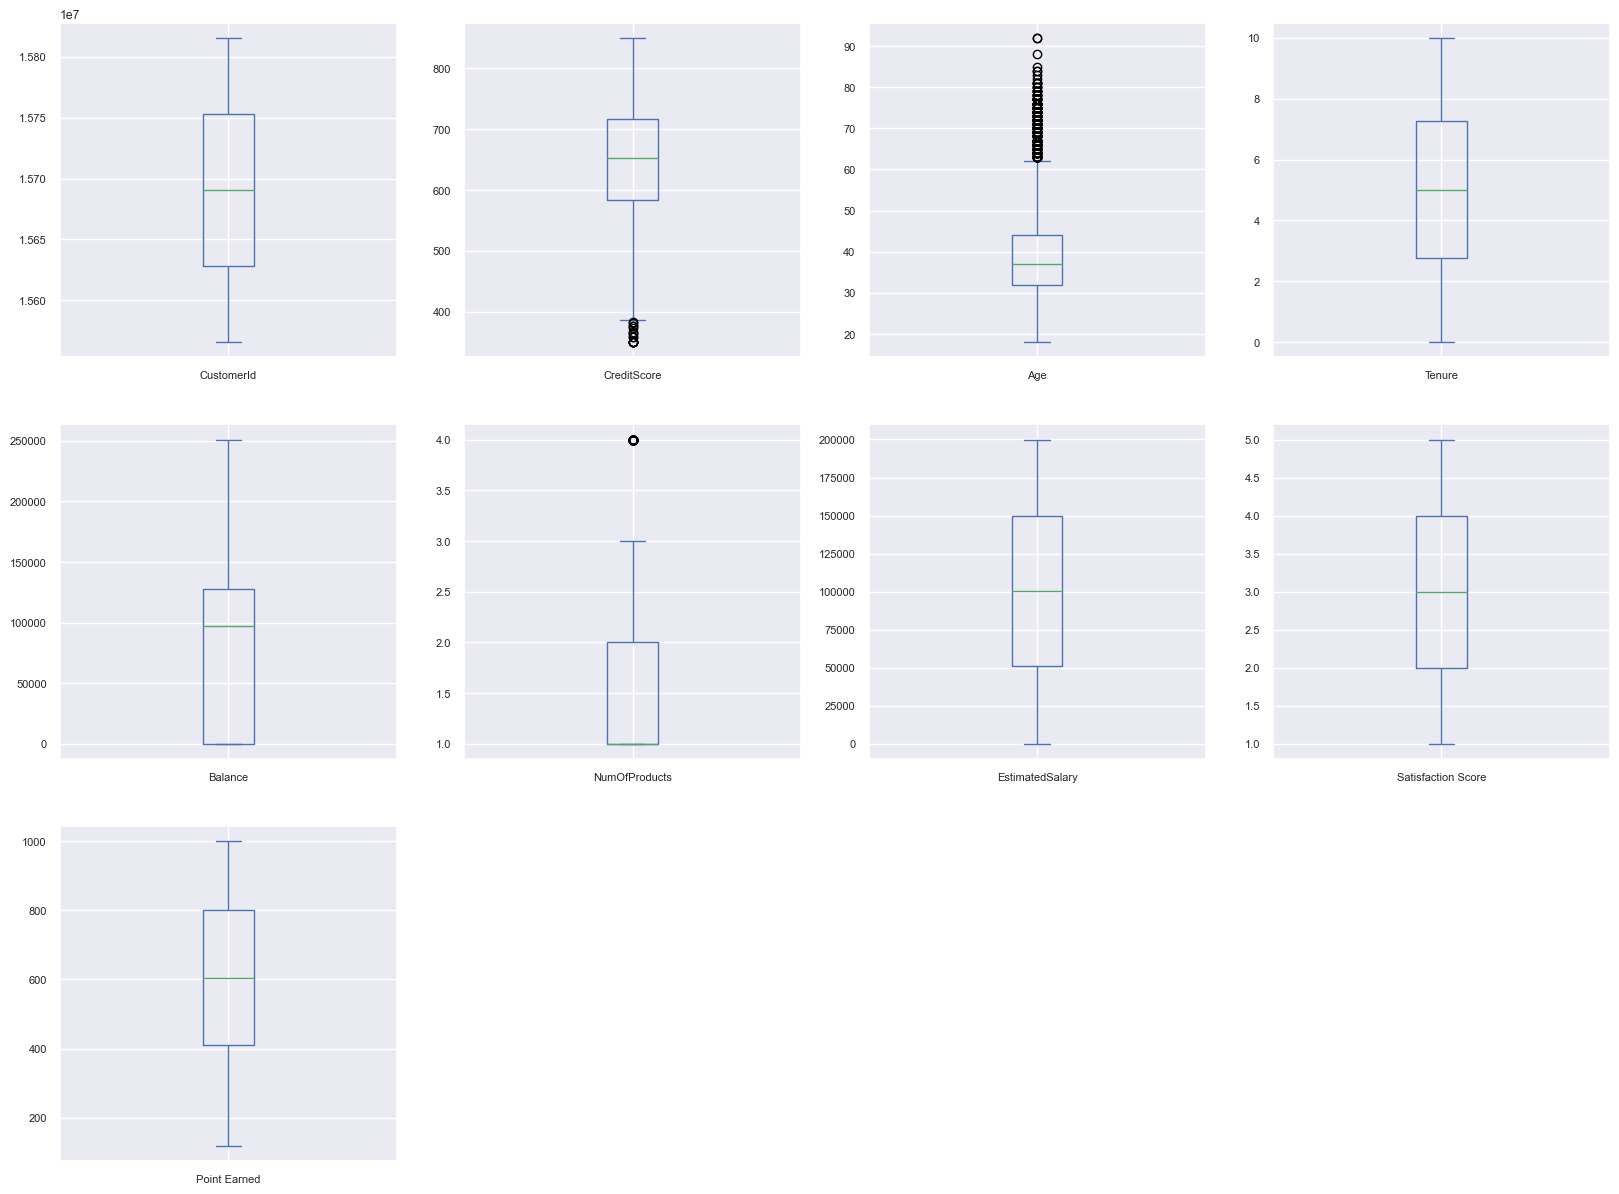

In [353]:
# plot all columns in boxplots

df.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,20), fontsize=8)


Outliers

In [354]:
# count the amount outliers with credit score lower than 350

df_low_credit = df[df['CreditScore'] < 400]
print("Number of rows with credit score lower than 400: ", df_low_credit['CreditScore'].count())


Number of rows with credit score lower than 400:  19


In [355]:
df_low_credit.head(5)

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7,15656148,376,Germany,Female,29,4,115046.74,4,True,False,119346.88,True,True,2,DIAMOND,282
942,15804586,376,France,Female,46,6,0.00,1,True,False,157333.69,True,True,2,PLATINUM,979
1193,15779947,363,Spain,Female,28,6,146098.43,3,True,False,100615.14,True,True,2,SILVER,324
1201,15651052,399,Germany,Male,46,2,127655.22,1,True,False,139994.68,True,True,5,PLATINUM,475
1405,15612494,359,France,Female,44,6,128747.69,1,True,False,146955.71,True,True,1,PLATINUM,981


In [356]:
# count and show the amount of outliers with number of products higher than 3

df_high_products = df[df['NumOfProducts'] > 3]
print("Number of rows with number of products higher than 3: ", df_high_products['NumOfProducts'].count())

Number of rows with number of products higher than 3:  59


In [357]:
df_high_products.head(20)

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7,15656148,376,Germany,Female,29,4,115046.74,4,True,False,119346.88,True,True,2,DIAMOND,282
70,15703793,738,Germany,Male,58,2,133745.44,4,True,False,28373.86,True,True,4,GOLD,725
1254,15610383,628,France,Female,46,1,46870.43,4,True,False,31272.14,True,True,1,DIAMOND,826
1469,15670374,819,Germany,Female,49,1,120656.86,4,False,False,166164.30,True,True,3,PLATINUM,991
1488,15625824,596,Spain,Male,30,6,121345.88,4,True,False,41921.75,True,True,2,SILVER,317
1701,15605279,792,France,Male,50,9,0.00,4,True,True,194700.81,True,True,4,DIAMOND,369
1876,15664754,640,Germany,Male,39,9,131607.28,4,False,True,6981.43,True,True,2,GOLD,436
2124,15603851,704,France,Male,32,7,127785.17,4,False,False,184464.70,True,True,1,PLATINUM,981
2196,15791700,773,Germany,Male,47,2,118079.47,4,True,True,143007.49,True,True,4,PLATINUM,668
2285,15783615,630,Germany,Male,50,3,129370.91,4,True,True,47775.34,True,True,1,GOLD,712


In [358]:
# show the unique values in each column

Location_unique = df["Location"].unique()
Gender_unique = df["Gender"].unique()
Card_Type_unique = df["Card Type"].unique()


print(Location_unique)
print(Gender_unique)
print(Card_Type_unique)


['France', 'Spain', 'Germany']
Categories (3, object): ['France', 'Germany', 'Spain']
['Female' 'Male']
['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']
Categories (4, object): ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER']


In [359]:
def check_replace():
    replace_list = [Location_unique, Gender_unique, Card_Type_unique]
    replace_cat_new = {}

    for value_list in replace_list:
        count = 0
        temp_dict = {}
        for key in value_list:
            temp_dict[key] = count
            count += 1
        replace_cat_new.update(temp_dict)
    return replace_cat_new


print(check_replace())      

{'France': 0, 'Spain': 1, 'Germany': 2, 'Female': 0, 'Male': 1, 'DIAMOND': 0, 'GOLD': 1, 'SILVER': 2, 'PLATINUM': 3}


In [360]:
df_cat_num = df.replace(check_replace()).copy(deep=True)
df_cat_num.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,0,0,42,2,0.00,1,True,True,101348.88,True,True,2,0,464
1,15647311,608,1,0,41,1,83807.86,1,False,True,112542.58,False,True,3,0,456
2,15619304,502,0,0,42,8,159660.80,3,True,False,113931.57,True,True,3,0,377
3,15701354,699,0,0,39,1,0.00,2,False,False,93826.63,False,False,5,1,350
4,15737888,850,1,0,43,2,125510.82,1,True,True,79084.10,False,False,5,1,425


In [361]:
new_data_num = new_data.replace(check_replace()).copy(deep=True)

In [362]:
import numpy as np

# import deepcopy to create a copy of the dataframe
from copy import deepcopy

from scipy.stats import mode


df_outliers = df_cat_num.copy(deep = True)

# Define function to detect and impute missing values using z-score
def detect_impute_outliers_zscore(data, cols, remove_outliers=False, corr_col=None,thres = 2, nan_method= 0):
    compair_data = data.copy(deep = True) # create a copy of the original dataframe
    outlier_df = pd.DataFrame() # create an empty dataframe to store the outliers
    outlier_dict = {}  # create an empty dictionary to store outliers for each column
    # thres set the threshold for the standard deviations, 3 is the default value for outliers
    table = [] # create an empty list to store the results of the z-score calculation
    for col in cols:
        column_data = data[col] # extract the data from the specified column
        count = 0
        if column_data.isna().sum() > 0: # check if the column contains missing values
            # impute the missing values based on the method specified in the 'nan_method' parameter
            if nan_method == 'mean':
                column_data = column_data.fillna(np.nanmean(column_data))
            elif nan_method == 'median':
                column_data = column_data.fillna(np.nanmedian(column_data))
            elif nan_method == 'mode':
                column_data = column_data.fillna(mode(column_data).mode[0])
            else:
                # imputs whatever value is specified in the 'nan_method' parameter
                column_data = column_data.fillna(nan_method)

        data[col] = column_data # update the column in the original dataframe with the imputed values
        mean = np.mean(column_data)  # calculate the mean of the specified column
        std = np.std(column_data)    # calculate the standard deviation of the specified column
        print(col,"\n")
        print("Imputed values: ", column_data.isna().sum()) # keep track of the number of imputed values
        print("before Mean:", mean, "Std:", std)    # print the calculated mean and standard deviation for the column
        print("Count:", count)
        outliers = []   # create an empty list to store outliers for the current column
        for i in column_data:    # loop through each element in the specified column
            z_score = (i-mean)/std   # calculate the z-score for the element
            count += 1
            if (np.abs(z_score) > thres):   # if the absolute value of the z-score is greater than the threshold
                if corr_col is not None:
                    outlier_pair = (i, compair_data[corr_col][count-1]) # create a tuple containing the outlier and its corresponding value from the correlation column
                    outliers.append(outlier_pair)  # add the tuple to the list of outliers
                    
            
                else:
                    outliers.append(i)
                if remove_outliers:
                    #data = data[data[col] != i] # remove the record tied to outlier from the dataframe
                    # apend the outlier to the outlier_df dataframe
                    outlier_df = outlier_df.append(data[data[col] == i])                    
                    #replace the outlier with the mean of the column
                    data[col] = data[col].replace(i, np.nanmean(column_data))
        
        outlier_dict[col] = outliers   # store the outliers for the current column in the outlier_dict
        mean = np.mean(data[col])  # calculate the mean of the specified column
        std = np.std(data[col])    # calculate the standard deviation of the specified column
        print("after Mean:", mean, "Std:", std, "\n")    # print the calculated mean and standard deviation for the column
        print("Outliers:", outliers, "\n")   # print the list of outliers for the column
       
    return outlier_dict, data, outlier_df   # return the dictionary of outliers and the updated dataframe



In [363]:
# Driver code
cols_to_check = ['CustomerId',	'CreditScore', 'Age', 'Tenure',	'Balance',	'EstimatedSalary', 'Satisfaction Score',	'Point Earned', 'NumOfProducts']
# define the columns to check for outliers

#corr_col = 'date'  # specify a column to check correlations

# call the detect_impute_outliers_zscore function with the data 'df', the specified columns, and the mean imputation method, and remove outliers from the dataframe
outliers_dict, updated_df, outlier_df = detect_impute_outliers_zscore(df_outliers, cols_to_check, remove_outliers=False,thres=3)   

CustomerId 

Imputed values:  0
before Mean: 15690897.256312625 Std: 71944.78672058422
Count: 0
after Mean: 15690897.256312625 Std: 71944.78672058422 

Outliers: [] 

CreditScore 

Imputed values:  0
before Mean: 650.5518036072144 Std: 96.63278227897327
Count: 0
after Mean: 650.5518036072144 Std: 96.63278227897327 

Outliers: [359, 350, 350, 358, 351, 350, 350, 350] 

Age 

Imputed values:  0
before Mean: 38.91442885771543 Std: 10.488379495103722
Count: 0
after Mean: 38.91442885771543 Std: 10.488379495103722 

Outliers: [75, 73, 72, 79, 80, 75, 72, 82, 74, 71, 72, 74, 76, 71, 73, 77, 74, 74, 74, 74, 74, 72, 77, 74, 88, 71, 72, 71, 75, 73, 76, 85, 74, 76, 72, 71, 74, 72, 72, 84, 71, 74, 84, 77, 79, 76, 73, 73, 76, 72, 71, 80, 74, 76, 75, 77, 74, 71, 75, 78, 74, 71, 77, 79, 81, 79, 71, 72, 71, 72, 72, 78, 75, 71, 73, 71, 71, 76, 73, 75, 73, 71, 72, 73, 92, 75, 71, 77, 92, 72, 71, 76, 72, 77, 74, 72, 73, 77, 71, 72, 81, 76, 74, 71, 76, 72, 81, 73, 71, 75, 71, 71, 71, 73, 72, 71, 81, 73, 7

In [364]:
print(outliers_dict)

{'CustomerId': [], 'CreditScore': [359, 350, 350, 358, 351, 350, 350, 350], 'Age': [75, 73, 72, 79, 80, 75, 72, 82, 74, 71, 72, 74, 76, 71, 73, 77, 74, 74, 74, 74, 74, 72, 77, 74, 88, 71, 72, 71, 75, 73, 76, 85, 74, 76, 72, 71, 74, 72, 72, 84, 71, 74, 84, 77, 79, 76, 73, 73, 76, 72, 71, 80, 74, 76, 75, 77, 74, 71, 75, 78, 74, 71, 77, 79, 81, 79, 71, 72, 71, 72, 72, 78, 75, 71, 73, 71, 71, 76, 73, 75, 73, 71, 72, 73, 92, 75, 71, 77, 92, 72, 71, 76, 72, 77, 74, 72, 73, 77, 71, 72, 81, 76, 74, 71, 76, 72, 81, 73, 71, 75, 71, 71, 71, 73, 72, 71, 81, 73, 74, 83, 71, 78, 72, 74, 80, 72, 76, 71, 71, 78, 78, 77, 77], 'Tenure': [], 'Balance': [], 'EstimatedSalary': [], 'Satisfaction Score': [], 'Point Earned': [], 'NumOfProducts': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]}


In [365]:
#print the min and max values for the outliers dictionary
for key in outliers_dict:
    if len(outliers_dict[key]) > 0:
        print(key, "min:", min(outliers_dict[key]), "max:", max(outliers_dict[key]))



CreditScore min: 350 max: 359
Age min: 71 max: 92
NumOfProducts min: 4 max: 4


In [366]:
print(len(outliers_dict['CreditScore']))

8


In [367]:
# print point earned lowest to highest to see if there are any outliers

df_outliers.sort_values(by=['Point Earned'], inplace=True)
df_outliers.head(20)


,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
12,15632264,476,0,0,34,10,0.00,2,True,False,26260.98,False,False,3,2,119
16,15737452,653,2,1,58,1,132602.88,1,True,False,5097.67,True,False,2,2,163
6,15592531,822,0,1,50,7,0.00,2,True,True,10062.80,False,False,2,2,206
2056,15577078,539,1,1,38,6,0.00,1,True,True,152880.07,True,True,3,2,219
6786,15795586,478,0,1,35,1,92474.05,1,True,False,178626.07,False,False,1,2,219
4038,15684461,469,1,0,31,6,0.00,1,True,False,146213.75,True,True,3,0,219
6258,15793346,602,0,0,72,3,0.00,2,True,True,171260.66,False,False,3,3,219
9594,15615931,746,0,0,37,4,0.00,2,False,True,171039.56,False,False,5,3,219
775,15752137,648,0,1,33,7,134944.00,1,True,True,117036.38,False,False,2,3,219
9539,15761706,705,1,0,39,8,144102.32,1,True,True,11682.36,False,False,2,1,219


In [368]:
# count the number of outliers for each column and print the results
for key in outliers_dict:
    print(key, ":", len(outliers_dict[key]))
    

CustomerId : 0
CreditScore : 8
Age : 133
Tenure : 0
Balance : 0
EstimatedSalary : 0
Satisfaction Score : 0
Point Earned : 0
NumOfProducts : 59


In [369]:
from scipy import stats

# Z-score method
z_scores = stats.zscore(df_cat_num[cols_to_check])
outliers_z_scores = np.abs(z_scores) > 3  # generally a z-score above 3 is considered as an outlier
outliers_z_scores_df = pd.DataFrame(outliers_z_scores, columns=cols_to_check)

# find min and max outliers for z-scores
min_max_z_scores = pd.DataFrame({
    'Min (Z-score)': df_cat_num[cols_to_check][outliers_z_scores].min(),
    'Max (Z-score)': df_cat_num[cols_to_check][outliers_z_scores].max()
})

# IQR method
Q1 = df_cat_num[cols_to_check].quantile(0.25)
Q3 = df_cat_num[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

lower_bound = df_cat_num[cols_to_check] < (Q1 - 1.7 * IQR)
upper_bound = df_cat_num[cols_to_check] > (Q3 + 1.7 * IQR)

outliers_IQR = lower_bound | upper_bound

# find min and max outliers for IQR
min_max_IQR = pd.DataFrame({
    'Min (IQR)': df_cat_num[cols_to_check][outliers_IQR].min(),
    'Max (IQR)': df_cat_num[cols_to_check][outliers_IQR].max()
})

# combine results
combined_outliers = pd.DataFrame({
    'Z-score': outliers_z_scores_df.sum(),
    'IQR': outliers_IQR.sum(),
    'Min (Z-score)': min_max_z_scores['Min (Z-score)'],
    'Max (Z-score)': min_max_z_scores['Max (Z-score)'],
    'Min (IQR)': min_max_IQR['Min (IQR)'],
    'Max (IQR)': min_max_IQR['Max (IQR)']
})

# if column has nan values remove the column for df
combined_outliers = combined_outliers.dropna(axis=0)



print(combined_outliers.to_latex(label='tab:combined_outliers', float_format="%.1f", position='H',caption='Number of outliers for the specified attributes'))


\begin{table}[H]
\centering
\caption{Number of outliers for the specified attributes}
\label{tab:combined_outliers}
\begin{tabular}{lrrrrrr}
\toprule
{} &  Z-score &  IQR &  Min (Z-score) &  Max (Z-score) &  Min (IQR) &  Max (IQR) \\
\midrule
CreditScore   &        8 &    6 &          350.0 &          359.0 &      350.0 &      351.0 \\
Age           &      133 &  281 &           71.0 &           92.0 &       65.0 &       92.0 \\
NumOfProducts &       59 &   59 &            4.0 &            4.0 &        4.0 &        4.0 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\3589943535.py:45: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined_outliers.to_latex(label='tab:combined_outliers', float_format="%.1f", position='H',caption='Number of outliers for the specified attributes'))


In [370]:
# count the number records with credit score of 850

df_850 = df[df['NumOfProducts'] == 4]

print("Number of rows with credit score of 850: ", df_850['CreditScore'].count())

Number of rows with credit score of 850:  59


In [371]:
# count number values for each unique value in each column

print(df["Location"].value_counts())
print(df["Gender"].value_counts())
print(df["Card Type"].value_counts())
print(df["NumOfProducts"].value_counts())
print(df["HasCreditCard"].value_counts())
print(df["IsActiveMember"].value_counts())
print(df["Exited"].value_counts())
print(df["Complain"].value_counts())

France     5005
Germany    2504
Spain      2471
Name: Location, dtype: int64
Male      5446
Female    4534
Name: Gender, dtype: int64
DIAMOND     2503
GOLD        2497
PLATINUM    2492
SILVER      2488
Name: Card Type, dtype: int64
1    5077
2    4579
3     265
4      59
Name: NumOfProducts, dtype: int64
True     7040
False    2940
Name: HasCreditCard, dtype: int64
True     5139
False    4841
Name: IsActiveMember, dtype: int64
False    7949
True     2031
Name: Exited, dtype: int64
False    7943
True     2037
Name: Complain, dtype: int64


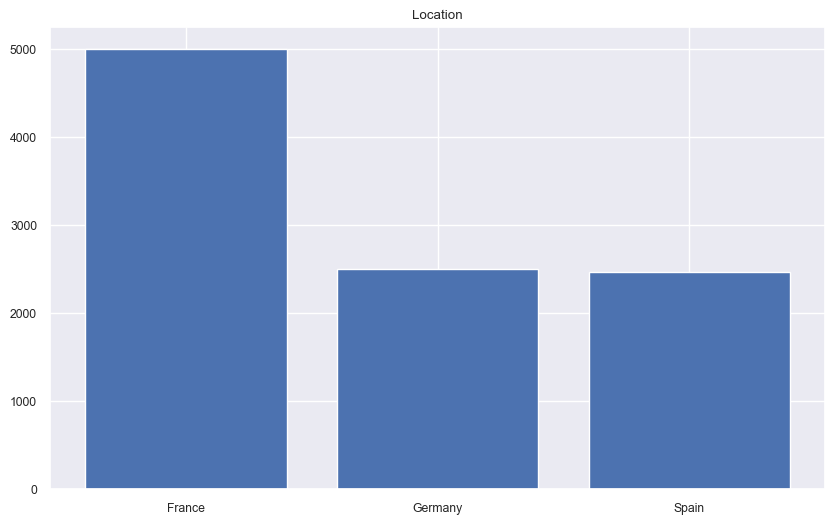

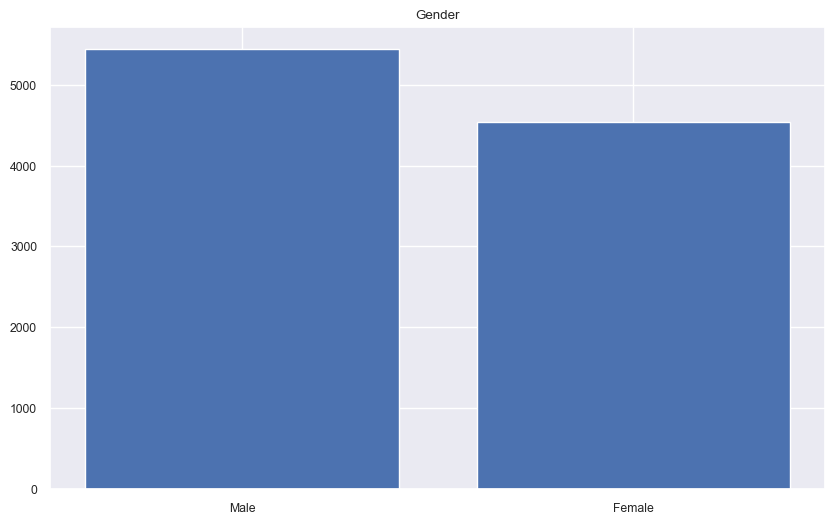

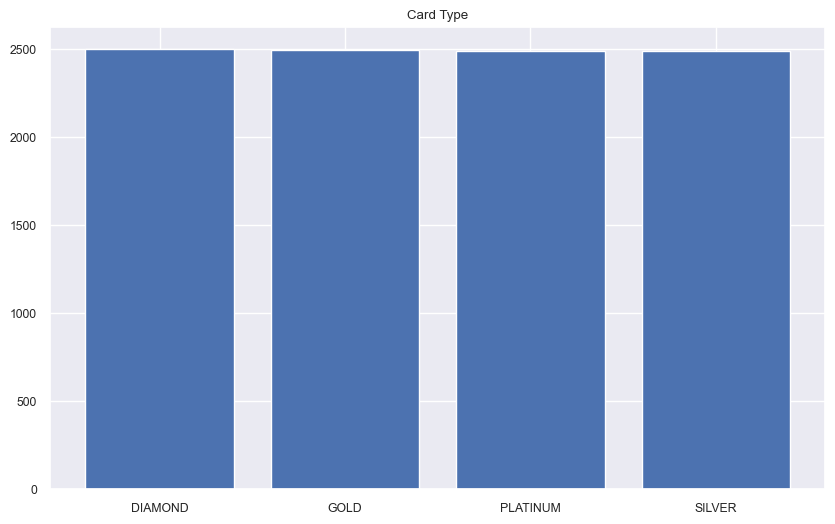

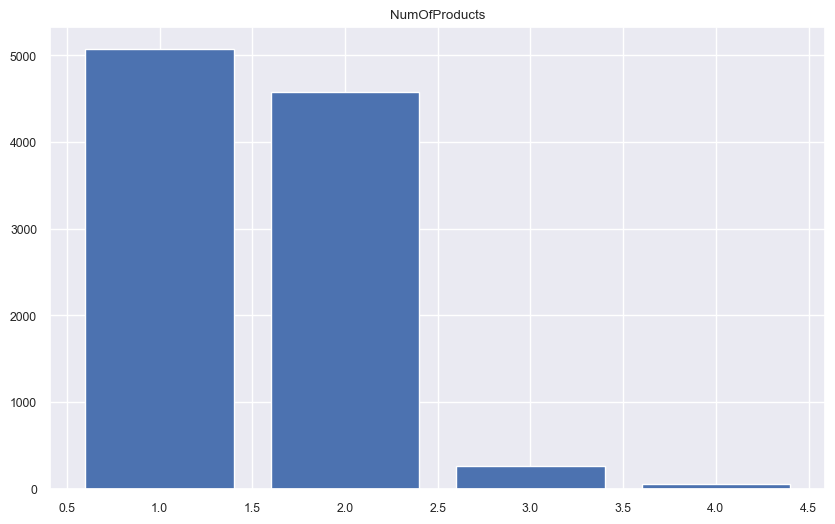

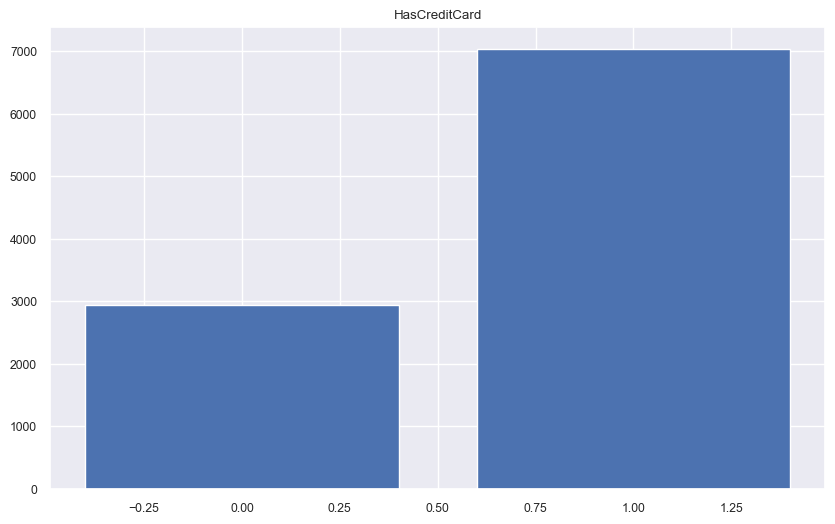

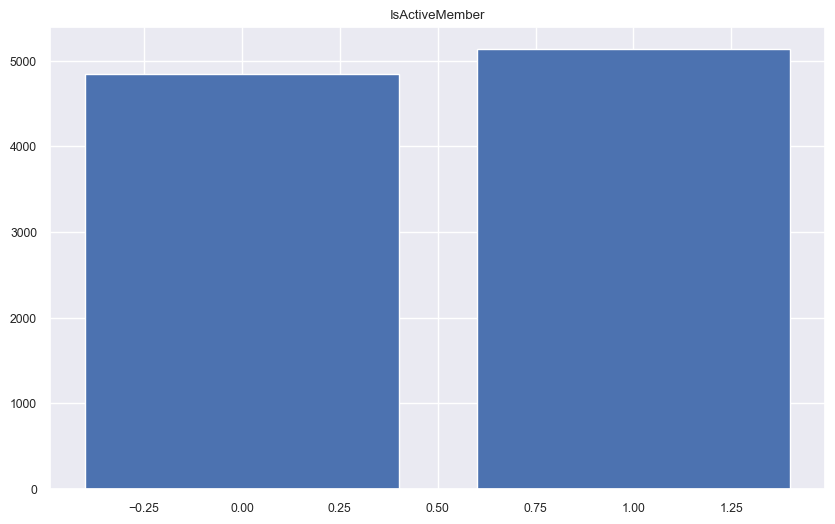

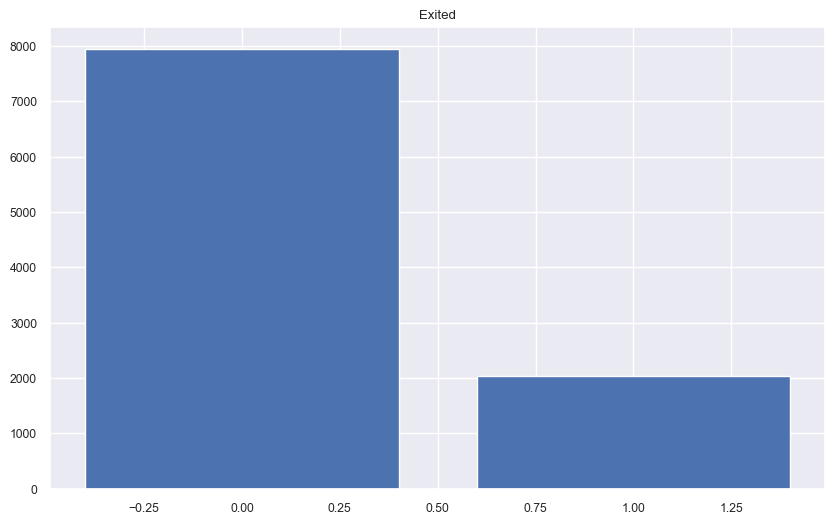

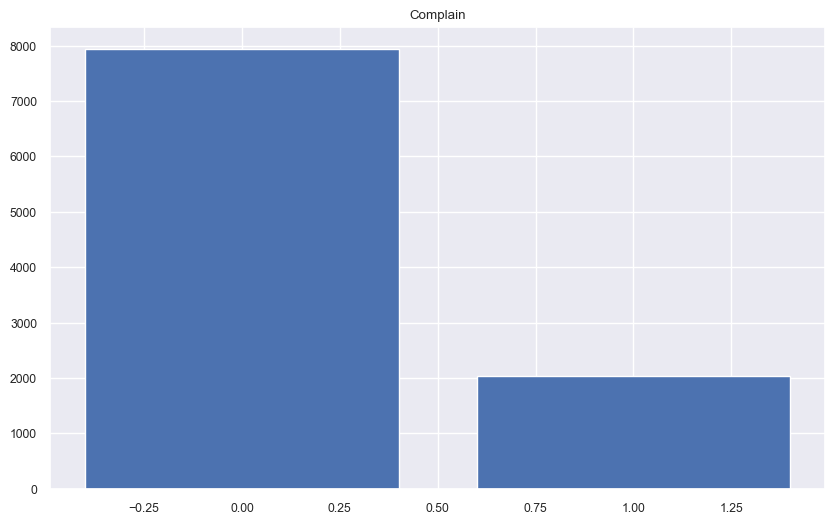

In [372]:
import matplotlib.pyplot as plt

data = {
    'Location': {'France': 5005, 'Germany': 2504, 'Spain': 2471},
    'Gender': {'Male': 5446, 'Female': 4534},
    'Card Type': {'DIAMOND': 2503, 'GOLD': 2497, 'PLATINUM': 2492, 'SILVER': 2488},
    'NumOfProducts': {1: 5077, 2: 4579, 3: 265, 4: 59},
    'HasCreditCard': {True: 7040, False: 2940},
    'IsActiveMember': {True: 5139, False: 4841},
    'Exited': {False: 7949, True: 2031},
    'Complain': {False: 7943, True: 2037}
}

for key in data.keys():
    plt.figure(figsize=(10, 6))
    plt.bar(data[key].keys(), data[key].values())
    plt.title(key)
    plt.show()


C:\Users\krist\AppData\Local\Temp\ipykernel_30184\2159932638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


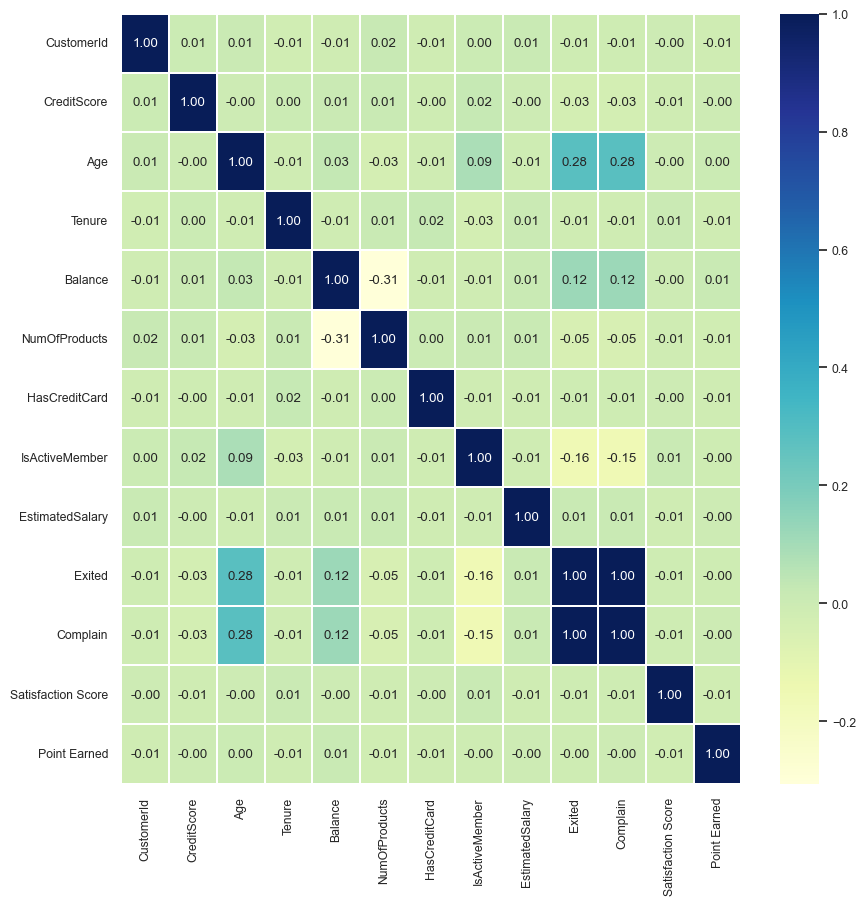

In [373]:
# check for correlation between the features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

sns.set(font_scale=0.8)
# plot the correlation matrix

# Set the figure size
plt.figure(figsize=(10, 10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu",linewidths=0.1)

# save the correlation matrix to a file
plt.savefig('correlation_matrix1.png',bbox_inches='tight')
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_30184\518828504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cat_num.corr()


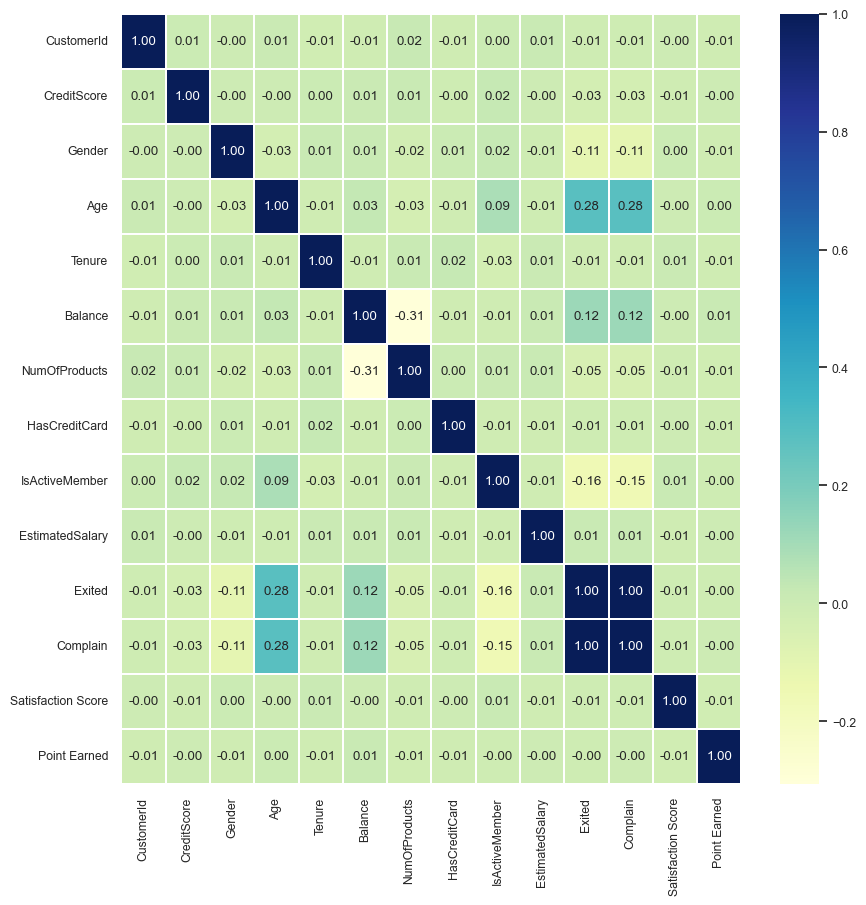

In [374]:
# check for correlation between the features
corr = df_cat_num.corr()
corr.style.background_gradient(cmap='coolwarm')

sns.set(font_scale=0.8)
# plot the correlation matrix

# Set the figure size
plt.figure(figsize=(10, 10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu",linewidths=0.1)
# save the correlation matrix to a file
plt.savefig('correlation_matrix.png',bbox_inches='tight')
plt.show()

Task A: (40%)

1: What is the proportion of the customers that are still using the
banking services compared to those that have left in the period
covered in the dataset? Is there a significant difference in the
proportion that the bank authority should be worried about? 

In [375]:
df.head()


,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,True,True,101348.88,True,True,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False,True,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,True,False,113931.57,True,True,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,False,False,93826.63,False,False,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False,False,5,GOLD,425


In [376]:
# Create a new DataFrame that counts the number of customers who exited and remained for each country
df_exit_counts = df.groupby(['Location', 'Exited']).size().unstack(fill_value=0)

# Rename the columns for clarity
df_exit_counts.columns = ['Remained', 'Exited']


# Compute the total for each category
df_exit_counts['Total'] = df_exit_counts.sum(axis=1).astype(int)


# Add a row for the total of each column
df_exit_counts.loc['Average'] = df_exit_counts.mean().astype(int)

# add percentage columns for exited
df_exit_counts['Exited %'] = (df_exit_counts['Exited'] / (df_exit_counts['Total']) * 100).round(2)
 
df_exit_counts


,Remained,Exited,Total,Exited %
Location,,,,
France,4197,808,5005,16.14
Germany,1692,812,2504,32.43
Spain,2060,411,2471,16.63
Average,2649,677,3326,20.35


In [377]:
latex_table = df_exit_counts.to_latex(label="tab:exit_counts",position="H",index=True,caption="Number of customers who exited and remained for each country",header=["Remained","Exited","Total","Exited %"])
print(latex_table)

\begin{table}[H]
\centering
\caption{Number of customers who exited and remained for each country}
\label{tab:exit_counts}
\begin{tabular}{lrrrr}
\toprule
{} & Remained & Exited & Total & Exited \% \\
Location &          &        &       &          \\
\midrule
France   &     4197 &    808 &  5005 &    16.14 \\
Germany  &     1692 &    812 &  2504 &    32.43 \\
Spain    &     2060 &    411 &  2471 &    16.63 \\
Average  &     2649 &    677 &  3326 &    20.35 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1613934633.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_exit_counts.to_latex(label="tab:exit_counts",position="H",index=True,caption="Number of customers who exited and remained for each country",header=["Remained","Exited","Total","Exited %"])


In [378]:
# group exited by location and calculate the mean of each feature
df_exited_location = df.groupby('Location').mean()

# add a percentage column
df_exited_location["Percentage"] = df_exited_location["Exited"] / df_exited_location["Exited"].sum() * 100
# add a total percentage row
df_exited_location.loc['Avg. Total'] = df_exited_location.mean()

# Compute the total for each category
#df_exited_location['Total'] = df_exited_location.sum(axis=1)

df_exited_location.head()

C:\Users\krist\AppData\Local\Temp\ipykernel_30184\883472428.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_exited_location = df.groupby('Location').mean()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Percentage
Location,,,,,,,,,,,,,,
France,1.569060e+07,649.721079,38.506494,5.002997,62127.510839,1.531069,0.706494,0.516683,99874.784212,0.161439,0.161638,3.017383,607.348851,24.758650
Germany,1.569055e+07,651.391773,39.753195,5.009984,119726.178283,1.518371,0.713658,0.496805,101073.465060,0.324281,0.326278,3.004792,610.309105,49.732625
Spain,1.569184e+07,651.383246,38.890732,5.031971,61902.282610,1.538244,0.694860,0.529745,99538.739413,0.166329,0.166329,3.014569,601.033994,25.508725
Avg. Total,1.569100e+07,650.832033,39.050140,5.014984,81251.990577,1.529228,0.705004,0.514411,100162.329562,0.217350,0.218082,3.012248,606.230650,33.333333


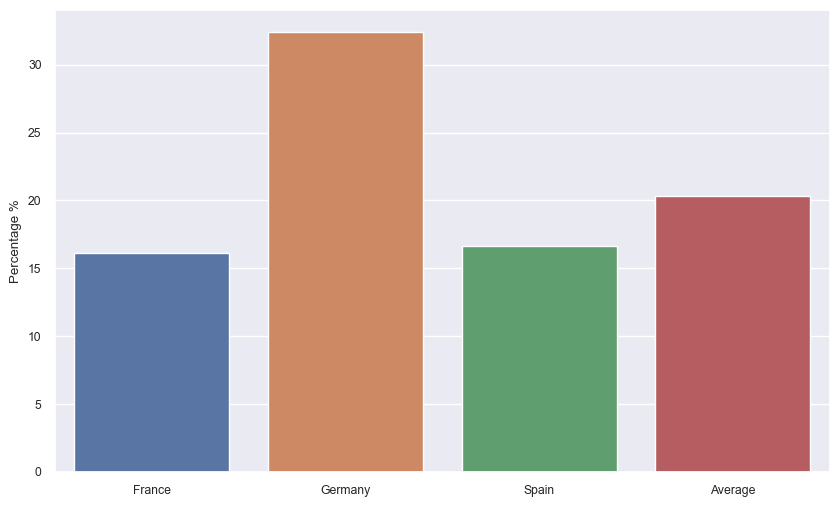

In [379]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_exit_counts.index, y=df_exit_counts['Exited %'])
plt.ylabel('Percentage %')
plt.xlabel('')
#plt.title('Percentage of Customers Exited by Location')
plt.savefig('Percentage of Customers Exited by Location.png',bbox_inches='tight')
plt.show()


2: What is the relationship between the number of complaints
received by the bank authorities and the number of exited
customers?

            Exited  Complain
Exited    1.000000  0.995679
Complain  0.995679  1.000000


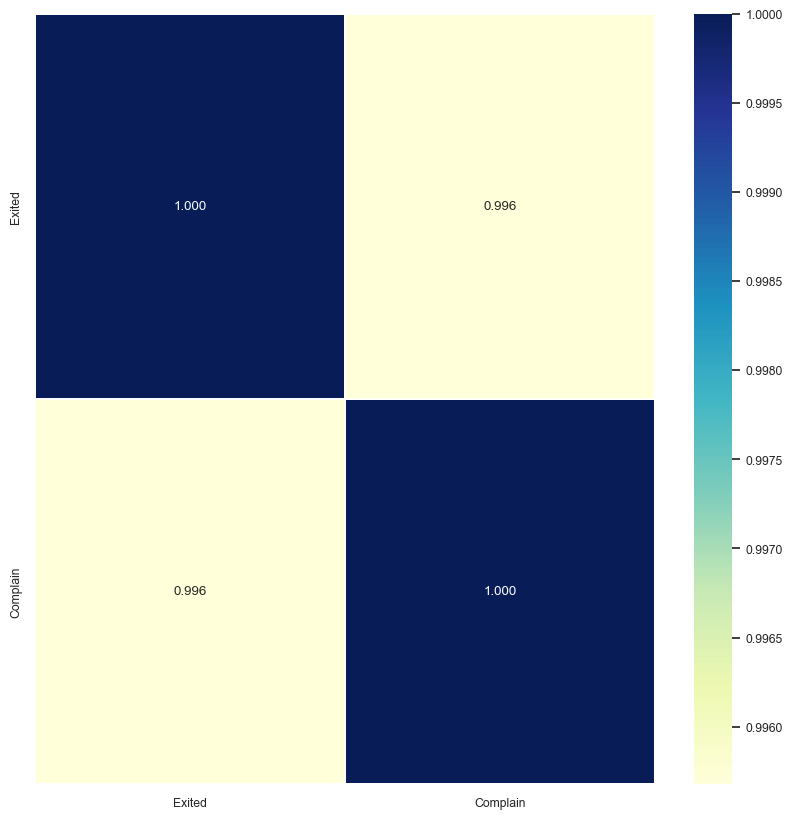

In [380]:
# correlation anaysis between customer exited and complaints
df_complain = df_cat_num.groupby('Complain').count()

# Calculate the correlation between 'Exited' and 'Complain' columns
correlation = df[['Exited', 'Complain']].corr()
print(correlation)

# plot the correlation matrix

# Set the figure size
plt.figure(figsize=(10, 10))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,fmt= '.3f',cmap="YlGnBu",linewidths=0.1)
# save the correlation matrix to a file
plt.savefig('correlation_matrix_complain.png',bbox_inches='tight')
plt.show()


In [381]:
# how many customers have exited and have complained vs complained and not exited

# Group the data by 'Exited' and 'Complain' columns and count the number of customers in each group
grouped_data = df.groupby(['Complain','Exited']).size().reset_index(name='Count')

# print latex table

print(grouped_data.to_latex(float_format="%.2f",position="H",index=False,label="tab:complain",caption="Number of customers who have exited and have complained vs complained and not exited"))


\begin{table}[H]
\centering
\caption{Number of customers who have exited and have complained vs complained and not exited}
\label{tab:complain}
\begin{tabular}{llr}
\toprule
 Complain &  Exited &  Count \\
\midrule
    False &   False &   7939 \\
    False &    True &      4 \\
     True &   False &     10 \\
     True &    True &   2027 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\88741426.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(grouped_data.to_latex(float_format="%.2f",position="H",index=False,label="tab:complain",caption="Number of customers who have exited and have complained vs complained and not exited"))


3: What are the characteristics and statistics (in terms of gender, age groups, and tenure etc,) of the customers that are more likely to complain? Provide an informative profile description of those type of customers. 

C:\Users\krist\AppData\Local\Temp\ipykernel_30184\965259057.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')


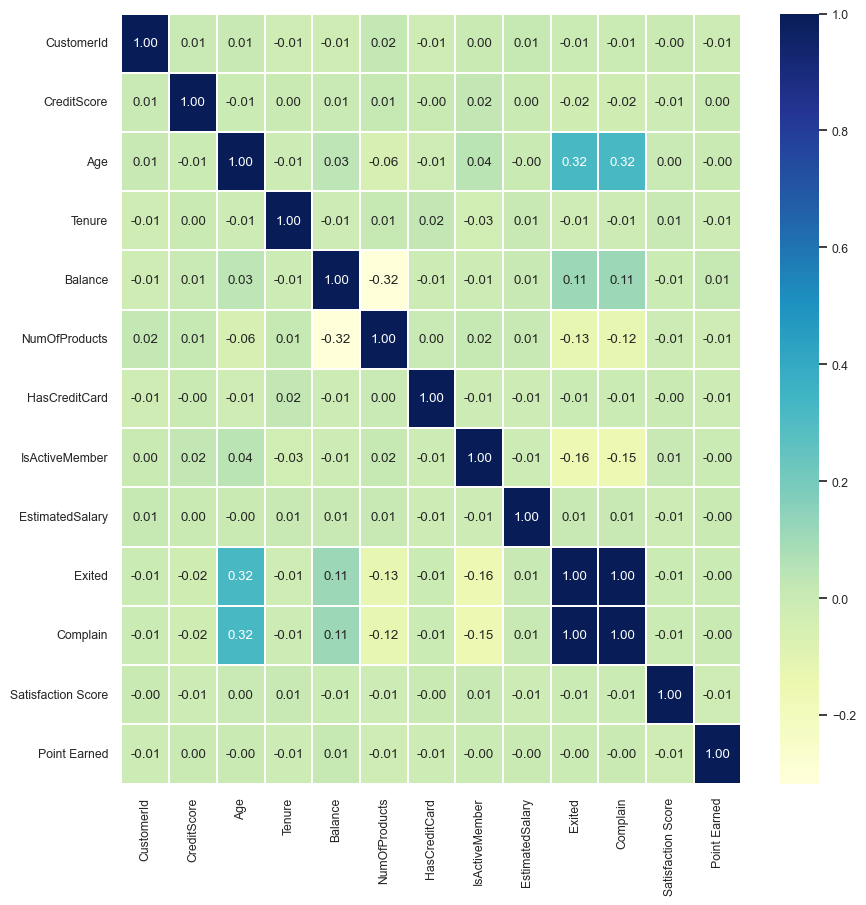

In [382]:
# Calculate the Spearman's correlation
spearman_corr = df.corr(method='spearman')

# Plot the correlation matrix
plt.figure(figsize=(10, 10))

sns.heatmap(spearman_corr, xticklabels=spearman_corr.columns, yticklabels=spearman_corr.columns, annot=True, fmt='.2f', cmap="YlGnBu", linewidths=0.1)

# Save the correlation matrix to a file
plt.savefig('correlation_matrix_spearman.png', bbox_inches='tight')

# Display the plot
plt.show()

In [383]:
# group by exited and calculate the mean of each feature
df_exited_mean = df_cat_num.groupby('Complain').mean()
df_exited_median = df_cat_num.groupby('Complain').median()

df_exited_mean.head().round(2)




C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1113671109.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_exited_mean = df_cat_num.groupby('Complain').mean()
C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1113671109.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_exited_median = df_cat_num.groupby('Complain').median()


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
Complain,,,,,,,,,,,,,
False,15691155.09,651.81,0.57,37.41,5.03,72758.51,1.54,0.71,0.55,99744.26,0.0,3.02,606.85
True,15689891.87,645.66,0.44,44.78,4.93,91203.84,1.48,0.70,0.36,101449.58,1.0,3.00,605.27


In [384]:
# Calculate the percentage difference between exited and not exited
df_exited_mean.loc['Percentage'] = (df_exited_mean.iloc[1] / df_exited_mean.iloc[0]) * 100

# Display the first 3 rows of the dataframe with values rounded to 2 decimal places
df_exited_mean.head(3).round(2)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
Complain,,,,,,,,,,,,,
False,15691155.09,651.81,0.57,37.41,5.03,72758.51,1.54,0.71,0.55,99744.26,0.00,3.02,606.85
True,15689891.87,645.66,0.44,44.78,4.93,91203.84,1.48,0.70,0.36,101449.58,1.00,3.00,605.27
Percentage,99.99,99.06,77.10,119.70,98.06,125.35,95.61,98.79,65.39,101.71,197600.16,99.38,99.74


In [385]:
# remove customer id column
df_exited_mean = df_exited_mean.drop(['CustomerId',"Exited","CreditScore","Tenure","HasCreditCard","EstimatedSalary","Satisfaction Score","Point Earned","NumOfProducts"], axis=1)


In [386]:
# Display the first 3 rows of the dataframe with values rounded to 2 decimal places
df_exited_mean.head(3).round(2)

,Gender,Age,Balance,IsActiveMember
Complain,,,,
False,0.57,37.41,72758.51,0.55
True,0.44,44.78,91203.84,0.36
Percentage,77.10,119.70,125.35,65.39


In [387]:
print(df_exited_mean.head(3).round(2).to_latex(float_format="%.2f",position="H",index=True,label="tab:exited_mean",caption="Mean of each feature for exited and not exited customers"))

\begin{table}[H]
\centering
\caption{Mean of each feature for exited and not exited customers}
\label{tab:exited_mean}
\begin{tabular}{lrrrr}
\toprule
{} &  Gender &    Age &  Balance &  IsActiveMember \\
Complain   &         &        &          &                 \\
\midrule
False      &    0.57 &  37.41 & 72758.51 &            0.55 \\
True       &    0.44 &  44.78 & 91203.84 &            0.36 \\
Percentage &   77.10 & 119.70 &   125.35 &           65.39 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\301100279.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_exited_mean.head(3).round(2).to_latex(float_format="%.2f",position="H",index=True,label="tab:exited_mean",caption="Mean of each feature for exited and not exited customers"))


In [392]:
# Filter the data for exited customers
df_exited = df[df['Exited'] == 1].copy(deep=True)

# Calculate the exited count for each location
df_exited_count = df_exited.groupby('Location').count()['Exited']

# Calculate the total customer count for each location
df_total_count = df.groupby('Location').count()['Exited']

# Calculate the percentage of customers that exited for each location
df_location_percentage = (df_exited_count / df_total_count) * 100

# Display the exited percentage for each location
df_location_percentage.head().round(2)

Location
France     16.14
Germany    32.43
Spain      16.63
Name: Exited, dtype: float64

In [393]:
df.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,True,True,101348.88,True,True,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False,True,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,True,False,113931.57,True,True,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,False,False,93826.63,False,False,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False,False,5,GOLD,425


In [394]:
# Calculate the total count for each attribute within each location
df_total_count = df.groupby('Location').mean().reset_index().copy(deep=True)

# Calculate the total count for each location
df_location_count = df.groupby(['Location']).mean().reset_index()[['Location', 'Complain']].copy(deep=True)

# Merge the total count for each attribute with the total count for each location
#df_total_count = df_total_count.merge(df_location_count, on='Location', suffixes=('', '_total'))


# Drop unnecessary columns
#df_total_count.drop(columns=['CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score','Complain','IsActiveMember','HasCreditCard'], inplace=True)

# Display the percentage distribution for each attribute within each location
print(df_total_count.head()[['Location', 'Complain','Balance']].round(2).to_latex(float_format="%.2f",position="H",index=False,label="tab:location_count",caption="Regional characteristics"))


\begin{table}[H]
\centering
\caption{Regional characteristics}
\label{tab:location_count}
\begin{tabular}{lrr}
\toprule
Location &  Complain &   Balance \\
\midrule
  France &      0.16 &  62127.51 \\
 Germany &      0.33 & 119726.18 \\
   Spain &      0.17 &  61902.28 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1156902011.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total_count = df.groupby('Location').mean().reset_index().copy(deep=True)
C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1156902011.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_location_count = df.groupby(['Location']).mean().reset_index()[['Location', 'Complain']].copy(deep=True)
C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1156902011.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatti

4: Is there a significant difference between the credit scores of all
the customers that have complained and those who have not in
the period covered in the dataset?

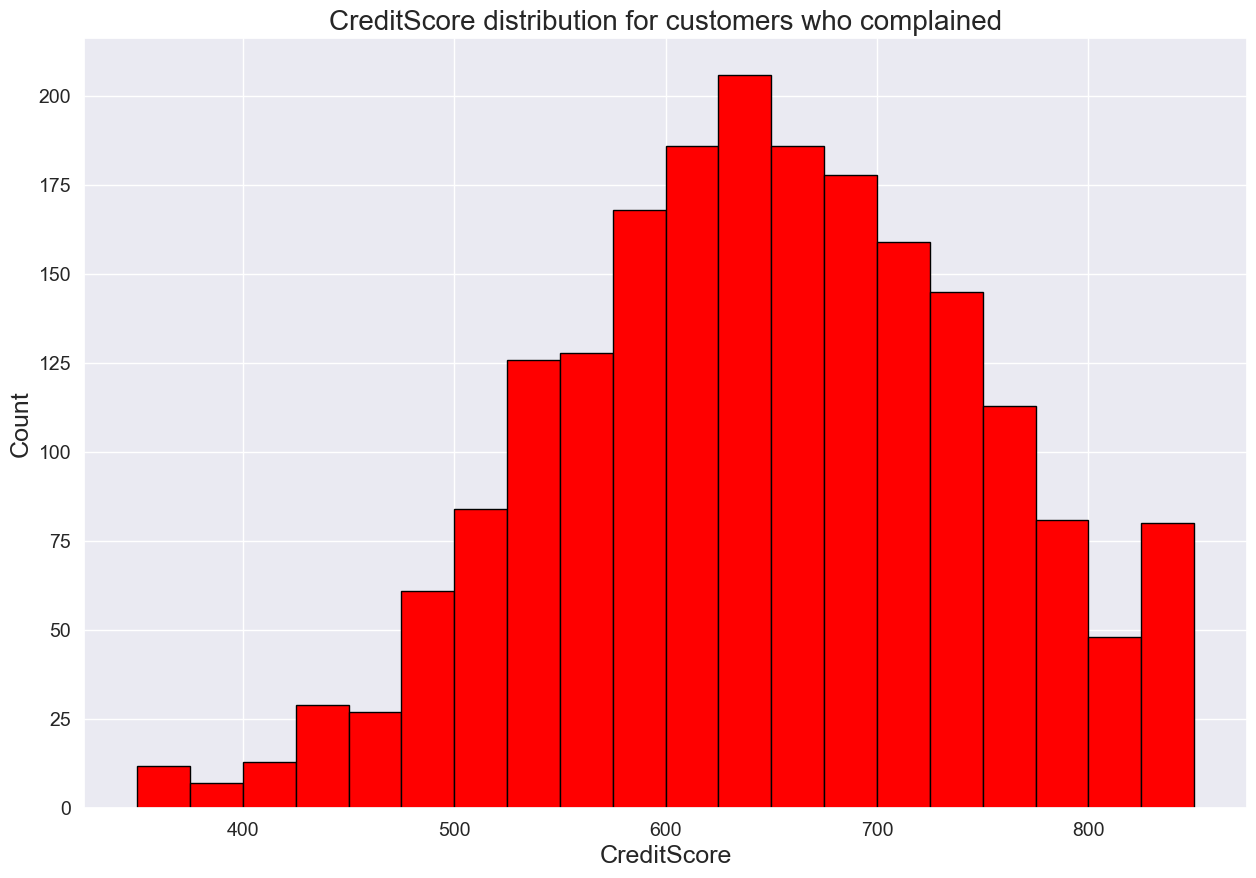

In [395]:
# histogram for CreditScore and complained

# Filter the data for customers who complained
df_complained = df_cat_num[df_cat_num['Complain'] == 1]

# Plot the histogram for CreditScore
df_complained['CreditScore'].plot(kind='hist', figsize=(15, 10), fontsize=14, bins=20, edgecolor='black', color='red')

# Set the title and labels for the plot
plt.title('CreditScore distribution for customers who complained', fontsize=20)
plt.xlabel('CreditScore', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Save the plot to a file
plt.savefig('histogram_complained.png', bbox_inches='tight')

In [396]:
# compair all the mean values for credit score of 850 and 850 below
df_credit_score_850 = df_cat_num.groupby('CreditScore').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1901505600.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_credit_score_850 = df_cat_num.groupby('CreditScore').mean()


Do scores credit scores of 850 deviate from other values that are not 850, result to conclude outliers?

In [397]:
# Filter the data for customers who have a credit score of 850 and those who have a credit score below 850
credit_score_850 = df_cat_num[df_cat_num['CreditScore'] == 850]
credit_score_below_850 = df_cat_num[df_cat_num['CreditScore'] < 850]

# Calculate the mean credit score for both groups
mean_credit_score_850 = credit_score_850.mean()
mean_credit_score_below_850 = credit_score_below_850.mean()

# Create a DataFrame to present the results
mean_credit_scores = pd.DataFrame({
    'Score Group': ['850', 'Below 850'],
    'Mean Credit Score': [mean_credit_score_850['CreditScore'], mean_credit_score_below_850['CreditScore']],
    'Mean Age': [mean_credit_score_850['Age'], mean_credit_score_below_850['Age']],
    'Mean Balance': [mean_credit_score_850['Balance'], mean_credit_score_below_850['Balance']],
    'Mean NumOfProducts': [mean_credit_score_850['NumOfProducts'], mean_credit_score_below_850['NumOfProducts']],
    'Mean HasCrCard': [mean_credit_score_850['HasCreditCard'], mean_credit_score_below_850['HasCreditCard']],
    'Mean IsActiveMember': [mean_credit_score_850['IsActiveMember'], mean_credit_score_below_850['IsActiveMember']],
    'Mean EstimatedSalary': [mean_credit_score_850['EstimatedSalary'], mean_credit_score_below_850['EstimatedSalary']],
    'Mean Exited': [mean_credit_score_850['Exited'], mean_credit_score_below_850['Exited']],
    'Mean Complain': [mean_credit_score_850['Complain'], mean_credit_score_below_850['Complain']],
    'Mean Satisfaction Score': [mean_credit_score_850['Satisfaction Score'], mean_credit_score_below_850['Satisfaction Score']],
    'Mean Points Earned': [mean_credit_score_850['Point Earned'], mean_credit_score_below_850['Point Earned']],
    # add other columns if needed
})

mean_credit_scores


C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1106308246.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_credit_score_850 = credit_score_850.mean()
C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1106308246.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_credit_score_below_850 = credit_score_below_850.mean()


,Score Group,Mean Credit Score,Mean Age,Mean Balance,Mean NumOfProducts,Mean HasCrCard,Mean IsActiveMember,Mean EstimatedSalary,Mean Exited,Mean Complain,Mean Satisfaction Score,Mean Points Earned
0,850,850.000000,38.918455,78718.993219,1.515021,0.699571,0.549356,95919.323777,0.184549,0.184549,2.806867,618.785408
1,Below 850,645.784036,38.914333,76470.868686,1.530009,0.705550,0.514107,100192.087221,0.203960,0.204576,3.018467,606.235047


In [398]:
import scipy.stats as stats

# Filter the data for customers who have complained and those who have not
complained = df[df['Complain'] == 1]['CreditScore'].copy(deep=True)
not_complained = df[df['Complain'] == 0]['CreditScore'].copy(deep=True)

# Perform a t-test for independent samples
t_stat, p_value = stats.ttest_ind(complained, not_complained)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: -2.5614564208056954
P-value: 0.01043799681227426


C:\Users\krist\AppData\Local\Temp\ipykernel_30184\4012749.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(complained, hist = False, kde = True,
c:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\krist\AppData\Local\Temp\ipykernel_30184\4012749.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot

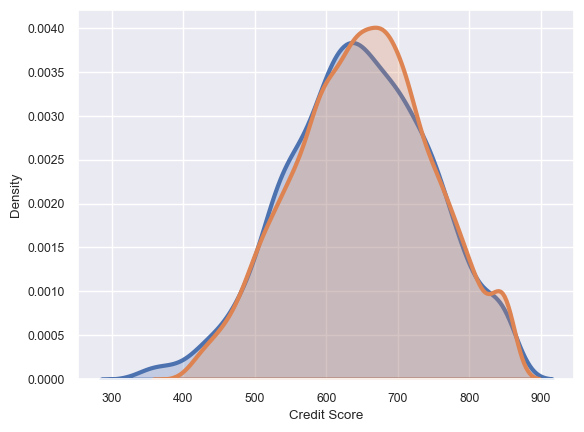

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Filter the data for customers who have complained and those who have not
complained = df[df['Complain'] == 1]['CreditScore'].copy(deep=True)
not_complained = df[df['Complain'] == 0]['CreditScore'].copy(deep=True)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the distribution of credit scores for customers who have complained
sns.distplot(complained, hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label = 'Complained', ax = ax)

# Plot the distribution of credit scores for customers who have not complained
sns.distplot(not_complained, hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label = 'Not Complained', ax = ax)

# Add a title and labels
#plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Density')

# Save the plot to a file
plt.savefig('credit_score_distribution.png', bbox_inches='tight')
# Display the plot
plt.show()

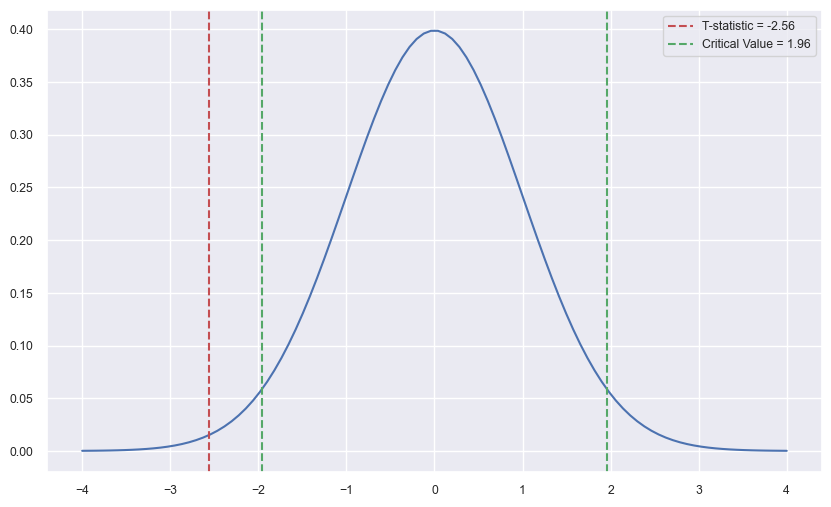

In [400]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Calculate degrees of freedom
degrees_freedom = len(complained) + len(not_complained) - 2

# Generate values between -4 and 4 (extreme t-score values)
values = np.linspace(-4, 4, 100)

# Create the t-distribution with calculated degrees of freedom
t_distribution = stats.t(degrees_freedom)

# Generate pdf for values
pdf_values = t_distribution.pdf(values)

# Calculate critical value
alpha = 0.05
critical_value = t_distribution.ppf(1 - alpha/2) # For two-tailed test

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(values, pdf_values)

# Add vertical lines at t-statistic and critical value
plt.axvline(t_stat, color='r', linestyle='--', label=f'T-statistic = {t_stat:.2f}')
plt.axvline(critical_value, color='g', linestyle='--', label=f'Critical Value = {critical_value:.2f}')
plt.axvline(-critical_value, color='g', linestyle='--')  # For the other tail
plt.title('')
plt.legend()
# Save the plot to a file
plt.savefig('t_distribution.png', bbox_inches='tight')

# Display the plot
plt.show()


5: Do the satisfaction scores on complain resolution provide
indication of the customers’ likelihood of exiting the bank?

In [401]:
df.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,True,True,101348.88,True,True,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False,True,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,True,False,113931.57,True,True,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,False,False,93826.63,False,False,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False,False,5,GOLD,425


In [402]:
#  Filter for the customers who have Complained
df_complained = df[df['Complain'] == 1].copy(deep=True)

# Group the data by 'Exited' and not exited and calculate the mean of each feature
df_complained_mean = df_complained.groupby('Exited').mean()

# add a column for count
df_complained_mean['Amount'] = df_complained.groupby('Exited').count()['CustomerId']

# Calculate the percentage difference between exited and not exited
df_complained_mean.loc['Total'] = (df_complained_mean.iloc[1] / df_complained_mean.iloc[0]) * 100




# Display the first 3 rows of the dataframe with values rounded to 2 decimal places
df_complained_mean.head(3).round(2)



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1027515290.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_complained_mean = df_complained.groupby('Exited').mean()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Amount
Exited,,,,,,,,,,,,,
False,15647540.20,648.60,34.90,5.40,110891.04,1.70,0.80,0.60,100276.70,1.0,3.30,694.80,10.0
True,15690100.81,645.65,44.83,4.93,91106.72,1.47,0.70,0.36,101455.37,1.0,3.00,604.83,2027.0
Total,100.27,99.54,128.45,91.33,82.16,86.74,87.26,60.19,101.18,100.0,90.82,87.05,20270.0


In [403]:
print(df_complained_mean[["Satisfaction Score","Amount"]].head(3).round(2).to_latex(float_format="%.2f",position="H",index=True,label="tab:complained_mean",caption="Mean of each feature for exited and not exited customers who have complained"))


\begin{table}[H]
\centering
\caption{Mean of each feature for exited and not exited customers who have complained}
\label{tab:complained_mean}
\begin{tabular}{lrr}
\toprule
{} &  Satisfaction Score &   Amount \\
Exited &                     &          \\
\midrule
False  &                3.30 &    10.00 \\
True   &                3.00 &  2027.00 \\
Total  &               90.82 & 20270.00 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\1207486201.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_complained_mean[["Satisfaction Score","Amount"]].head(3).round(2).to_latex(float_format="%.2f",position="H",index=True,label="tab:complained_mean",caption="Mean of each feature for exited and not exited customers who have complained"))


In [404]:
# max stisfaction score
df['Satisfaction Score'].max()

5

6: The bank has a reward system where the customers earn points
when they use their Diamond, Gold, Silver, and Platinum bank
card. Determine if there is a significant difference in the average
points earned by the different groups of customers.

In [405]:
# group by card type and calculate the mean of each feature

df_card_type = df.groupby('Card Type').mean()

df_card_type.head()


C:\Users\krist\AppData\Local\Temp\ipykernel_30184\4280554526.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_card_type = df.groupby('Card Type').mean()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
Card Type,,,,,,,,,,,,,
DIAMOND,1.569052e+07,651.052337,38.983620,5.007591,79165.641654,1.510188,0.708350,0.495006,98455.926840,0.217339,0.217739,2.996404,606.158210
GOLD,1.569248e+07,652.286744,38.922707,5.075290,76726.634838,1.521426,0.694834,0.524630,100541.243296,0.192231,0.193032,3.042851,606.924309
PLATINUM,1.569043e+07,648.368379,39.006019,4.918138,75700.507307,1.550562,0.707063,0.518459,100215.561986,0.203451,0.204655,3.009230,608.947833
SILVER,1.569016e+07,650.493971,38.744775,5.046624,74485.293424,1.536576,0.711415,0.521704,101164.640965,0.200965,0.200965,3.005627,604.078778


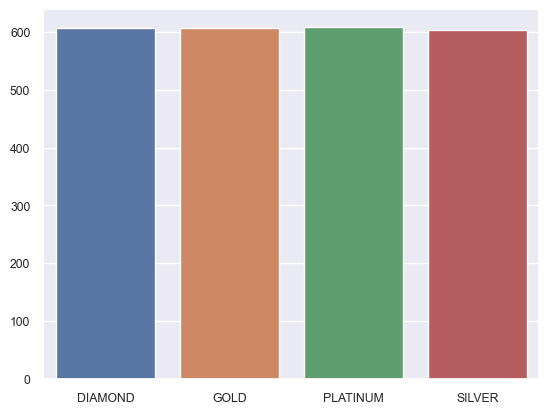

In [406]:
# plot a bar chart in seaborn for points earned and card type

sns.barplot(x='Card Type', y='Point Earned', data=df_card_type.reset_index())

# Set the title and labels for the plot
plt.title('', fontsize=20)
plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)

# Save the plot to a file
plt.savefig('median_points_earned_card_type_seaborn.png', bbox_inches='tight')

# Display the plot
plt.show()

In [407]:
# Filter the data for the four types of cards
diamond_data = df[df['Card Type'] == 'DIAMOND']['Point Earned']
gold_data = df[df['Card Type'] == 'GOLD']['Point Earned']
platinum_data = df[df['Card Type'] == 'PLATINUM']['Point Earned']
silver_data = df[df['Card Type'] == 'SILVER']['Point Earned']

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(diamond_data, gold_data, platinum_data, silver_data)

# Print the results
print('F statistic:', f_statistic)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print('Reject null hypothesis: There is a significant difference in the mean points earned among the groups.')
else:
    print('Fail to reject null hypothesis: There is no significant difference in the mean points earned among the groups.')

F statistic: 0.1976248954357644
p-value: 0.8980588339589598
Fail to reject null hypothesis: There is no significant difference in the mean points earned among the groups.


In [408]:

# Filter the data for the four types of cards
diamond_data = df[df['Card Type'] == 'DIAMOND']['Point Earned']
gold_data = df[df['Card Type'] == 'GOLD']['Point Earned']
platinum_data = df[df['Card Type'] == 'PLATINUM']['Point Earned']
silver_data = df[df['Card Type'] == 'SILVER']['Point Earned']

# Create a list of data for each card type
card_types = [diamond_data, gold_data, platinum_data, silver_data]

# Calculate the overall mean
overall_mean = np.mean(np.concatenate(card_types))

# Calculate the sum of squares between (SSB)
ssb = sum(len(data) * (np.mean(data) - overall_mean)**2 for data in card_types)

# Calculate the sum of squares within (SSW)
ssw = sum(sum((x - np.mean(data))**2 for x in data) for data in card_types)

# Calculate the total sum of squares (SST)
sst = ssb + ssw

# Calculate the degrees of freedom between (dfB)
dfb = len(card_types) - 1

# Calculate the degrees of freedom within (dfW)
dfw = sum(len(data) - 1 for data in card_types)

# Calculate the total degrees of freedom (dfT)
dft = dfb + dfw

# Calculate the mean square between (MSB)
msb = ssb / dfb

# Calculate the mean square within (MSW)
msw = ssw / dfw

# Calculate the F-statistic
f_statistic = msb / msw

# Create a DataFrame for the ANOVA table
anova_table = pd.DataFrame({
    'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
    'SS': [ssb, ssw, sst],
    'df': [dfb, dfw, dft],
    'MS': [msb, msw, np.nan],
    'F': [f_statistic, np.nan, np.nan]
})

# Print the DataFrame
print(anova_table.to_latex(float_format="%.2f",position="H",index=False,label="tab:anova_table",caption="ANOVA table for the card types"))


\begin{table}[H]
\centering
\caption{ANOVA table for the card types}
\label{tab:anova_table}
\begin{tabular}{lrrrr}
\toprule
Source of Variation &           SS &   df &       MS &    F \\
\midrule
     Between Groups &     30251.32 &    3 & 10083.77 & 0.20 \\
      Within Groups & 509023589.82 & 9976 & 51024.82 &  NaN \\
              Total & 509053841.14 & 9979 &      NaN &  NaN \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\3341146708.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(anova_table.to_latex(float_format="%.2f",position="H",index=False,label="tab:anova_table",caption="ANOVA table for the card types"))


C:\Users\krist\AppData\Local\Temp\ipykernel_30184\3444900282.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond_data, hist = False, kde = True,
c:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\krist\AppData\Local\Temp\ipykernel_30184\3444900282.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `

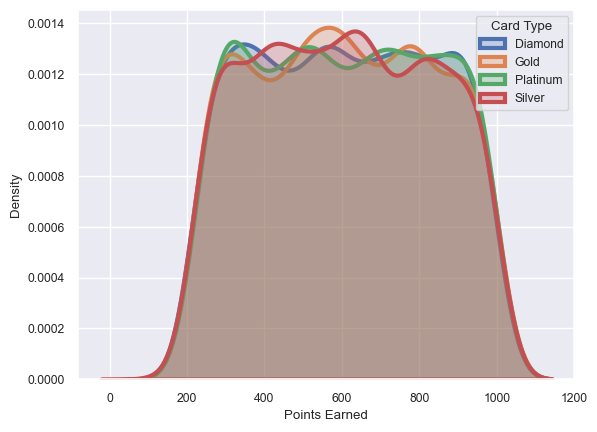

In [409]:
# graph the anova test
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the distribution of points earned for each card type
sns.distplot(diamond_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3},
                label = 'Diamond', ax = ax)

sns.distplot(gold_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3},
                label = 'Gold', ax = ax)

sns.distplot(platinum_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3},
                label = 'Platinum', ax = ax)

sns.distplot(silver_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3},
                label = 'Silver', ax = ax)

# Add a title and labels
plt.title('')
plt.xlabel('Points Earned')
plt.ylabel('Density')

# Add legend
ax.legend(title='Card Type')

# Save the plot to a file
plt.savefig('points_earned_distribution.png', bbox_inches='tight')


## Task B: (40%)

Develop a model to predict whether a customer will complain or not
given the historical customer records in the Main Sample file.
Evaluate the developed model using appropriate metrics and report
its performances accordingly. Remember to also discuss the
implications of the performance (error or accuracy) of the model
with respect to the banking business. 

In [410]:
df_cat_num.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,0,0,42,2,0.00,1,True,True,101348.88,True,True,2,0,464
1,15647311,608,1,0,41,1,83807.86,1,False,True,112542.58,False,True,3,0,456
2,15619304,502,0,0,42,8,159660.80,3,True,False,113931.57,True,True,3,0,377
3,15701354,699,0,0,39,1,0.00,2,False,False,93826.63,False,False,5,1,350
4,15737888,850,1,0,43,2,125510.82,1,True,True,79084.10,False,False,5,1,425


In [411]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection   import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

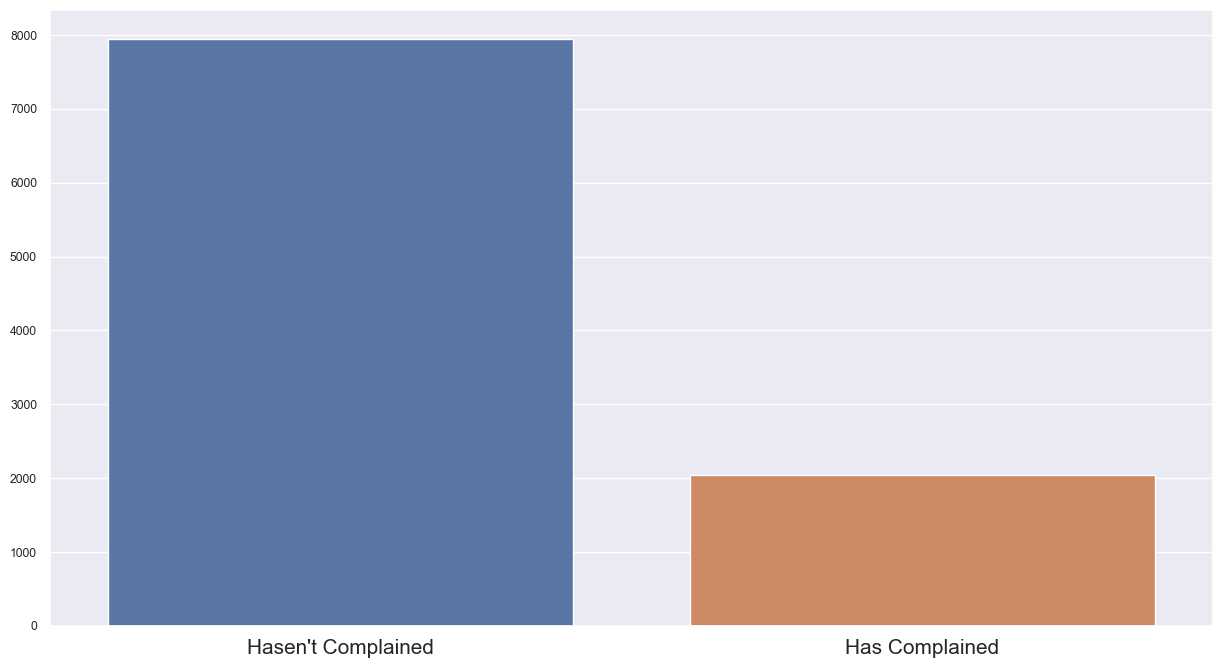

In [412]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Complain", data=df_cat_num)
ax.set_xticklabels(['Hasen\'t Complained', 'Has Complained'])
plt.xlabel('', size=15)
plt.xticks(size=15)
plt.ylabel('', size=15)
plt.savefig('histogram_complain.png', bbox_inches='tight')
plt.show()

In [413]:
from sklearn.utils import resample

# Assuming df_cat_num is your DataFrame and 'Complain' is your target column
Outcome_1 = df_cat_num[df_cat_num['Complain'] == 1]
Outcome_0 = df_cat_num[df_cat_num['Complain'] == 0]

# Count the number of Outcome_1 instances
Count_Outcome_1 = Outcome_1.shape[0]

# Perform random undersampling on Outcome_0
Outcome_0_undersampled = resample(Outcome_0, 
                                  replace=False,    # sample without replacement
                                  n_samples=Count_Outcome_1,     # to match minority class
                                  random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_undersampled = pd.concat([Outcome_0_undersampled, Outcome_1])

# Display new class counts
print(df_undersampled['Complain'].value_counts())

False    2037
True     2037
Name: Complain, dtype: int64


In [414]:
#Create a new dataframe to hold the rows for each target value ('0' and '1')
#Outcome_0 = df_cat_num[df_cat_num['Complain'] == 0]
#Outcome_1 = df_cat_num[df_cat_num['Complain'] == 1]

In [415]:
#Outcome_0.head()

In [416]:
#Count_Outcome_1 = Outcome_1.Complain.count()             
#Outcome_0_Reduced = Outcome_0.sample(Count_Outcome_1)  
#Balanced_Dataset_file = pd.concat([Outcome_0_Reduced,Outcome_1], axis=0)
#print(Balanced_Dataset_file.shape)

Text(0, 0.5, 'Number of Observations')

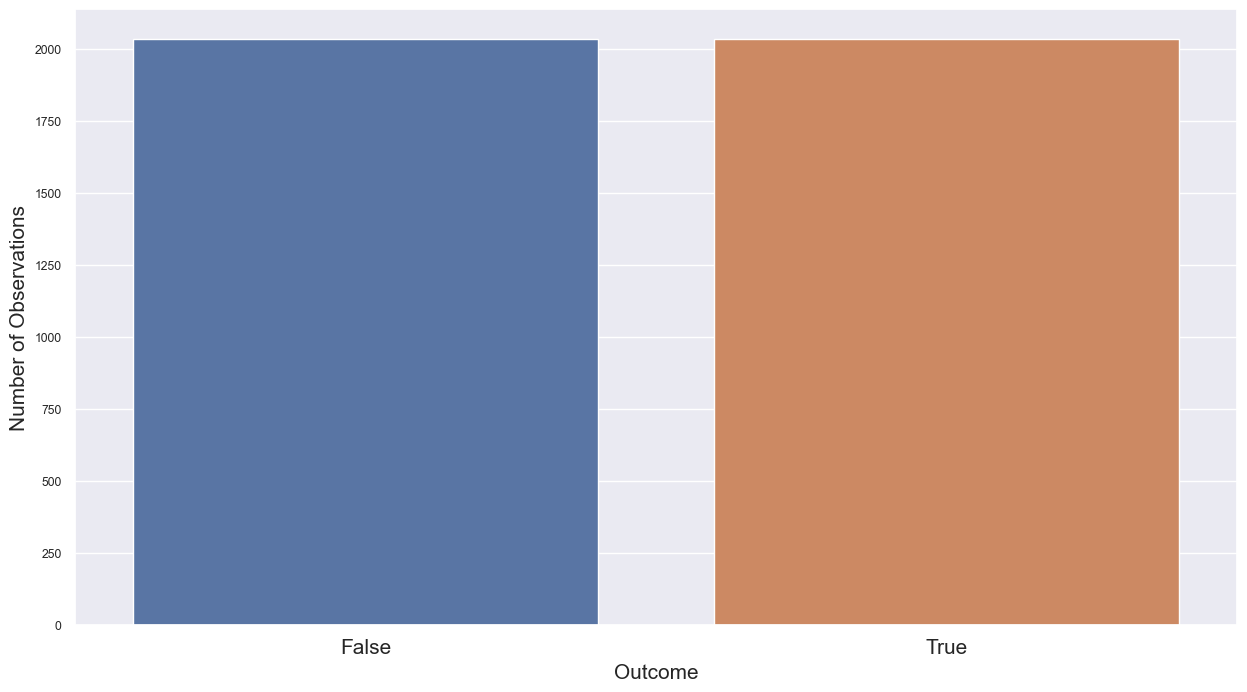

In [417]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Complain", data=df_undersampled)
plt.xlabel('Outcome',size=15)
plt.xticks(size=15)
plt.ylabel('Number of Observations',size=15)

In [418]:
Dataset_Analysis = pd.DataFrame(df_undersampled)
Y  = Dataset_Analysis['Complain'] 
del Dataset_Analysis['Complain']

In [419]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Dataset_Analysis)
scaled_Attributes = scaler.transform(Dataset_Analysis)
#Convert to table format - MinMaxScaler
X = pd.DataFrame(data=scaled_Attributes, index=Dataset_Analysis.index, columns=Dataset_Analysis.columns)
X.sample(5)

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
1228,0.051239,0.618,0.0,0.0,0.270270,0.3,0.000000,0.333333,1.0,0.0,0.792783,0.0,1.00,0.666667,0.749040
1881,0.416891,0.360,0.5,0.0,0.243243,0.2,0.000000,0.333333,1.0,1.0,0.073558,0.0,1.00,0.333333,0.964149
7534,0.016845,0.712,0.5,1.0,0.162162,0.6,0.349184,0.333333,0.0,0.0,0.688381,1.0,0.75,0.666667,0.542894
2676,0.305172,0.634,1.0,1.0,0.337838,0.1,0.410599,0.000000,1.0,0.0,0.162270,1.0,0.75,0.000000,0.723431
103,0.843650,0.356,0.5,1.0,0.243243,0.7,0.000000,0.333333,1.0,0.0,0.302654,0.0,1.00,0.666667,0.306018


In [420]:
# remove customer id column and exited column
X = X.drop(['CustomerId','Exited'], axis=1)
X.head()

,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
1484,1.000,0.5,0.0,0.148649,0.1,0.000000,0.333333,1.0,1.0,0.990020,0.50,0.000000,0.403329
2896,0.864,0.0,0.0,0.202703,0.2,0.376619,0.000000,0.0,1.0,0.509323,0.50,1.000000,0.134443
9015,0.370,0.0,1.0,0.364865,0.2,0.000000,0.333333,1.0,0.0,0.628294,1.00,0.000000,0.270166
1796,0.410,0.0,1.0,0.256757,0.9,0.498087,0.000000,1.0,0.0,0.300941,0.25,0.333333,0.877081
4176,0.808,1.0,0.0,0.283784,0.8,0.515755,0.000000,1.0,1.0,0.438409,0.25,0.333333,0.476312


In [421]:
#Build a forest and compute the importance of each attribute.
forest = ExtraTreesClassifier(n_estimators=250, random_state=0) # for classification task
forest.fit(X,Y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] 

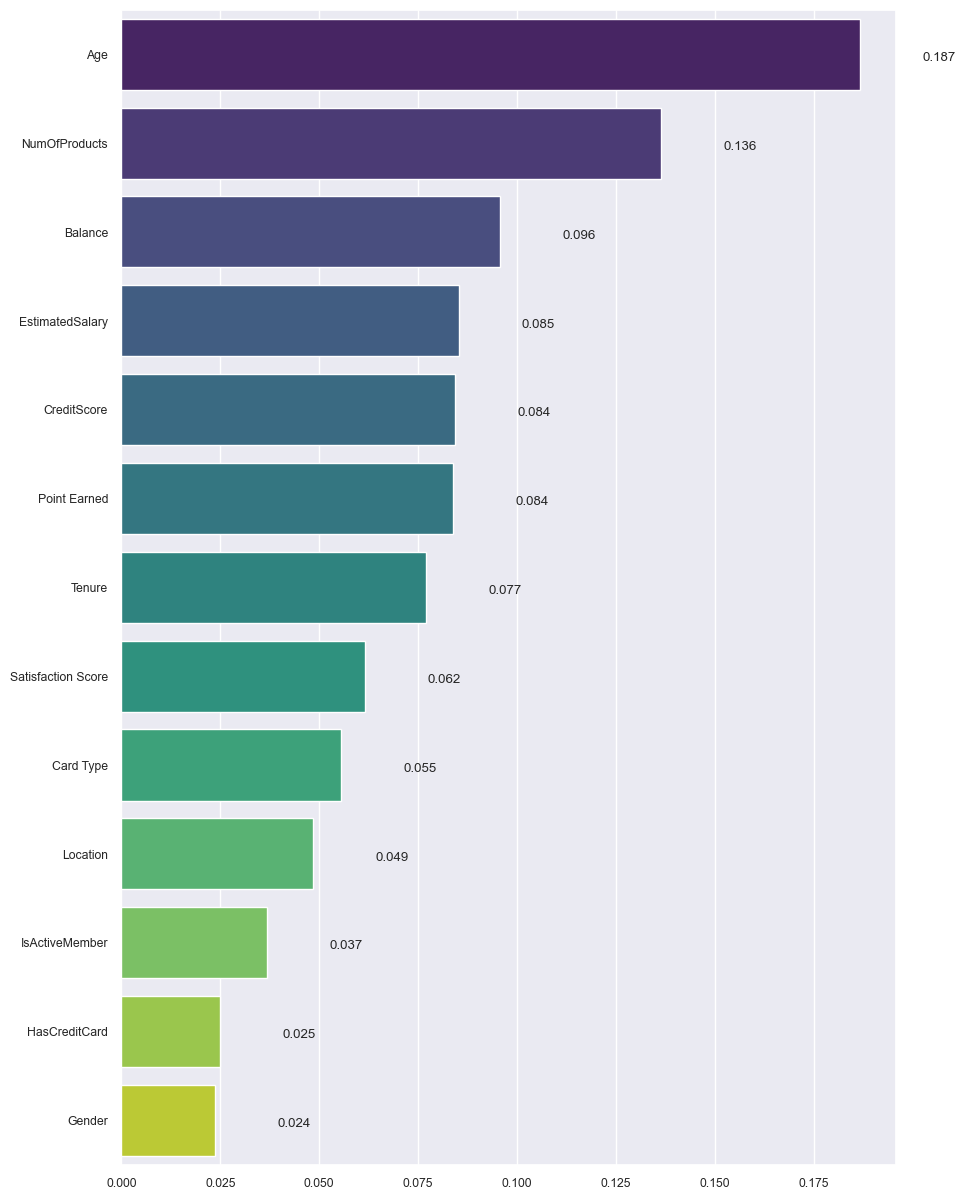

In [422]:
plt.figure(figsize=(10,15))
barplot = sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis", orient='h')
#plt.xlabel('Importance Level\n', size=15)
#plt.ylabel('\nAttribute', size=15)

# Adding the text on the bars
for p in barplot.patches:
    width = p.get_width()
    plt.text(0.02+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.3f}'.format(width),
             ha='center', va='center')

# change the size of the barplot
#sns.set(font_scale=20)

# Save the plot to a file
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()


In [423]:
# create a list of columns with importance level greater than 0.075 and convert to column names
columns_names = []
for i in range(len(importances)):
    if importances[i] > 0.083:
        columns_names.append(X.columns[i])
print(columns_names)

# create a new dataframe with the columns with importance level greater than 0.075
X_new = X[columns_names].copy(deep=True)
X_new.head()


['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']


,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Point Earned
1484,1.000,0.148649,0.000000,0.333333,0.990020,0.403329
2896,0.864,0.202703,0.376619,0.000000,0.509323,0.134443
9015,0.370,0.364865,0.000000,0.333333,0.628294,0.270166
1796,0.410,0.256757,0.498087,0.000000,0.300941,0.877081
4176,0.808,0.283784,0.515755,0.000000,0.438409,0.476312


In [424]:
#Split the data into training/testing sets 
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=1)

In [425]:
#Build a Logistic Regression model 
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression().fit(x_train,y_train)

In [426]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = LR_model.predict(x_test)
Prediction_accuracy = accuracy_score(y_test, y_pred)
print('Prediction accuracy score:\t %0.2f'   % (Prediction_accuracy * 100))


Prediction accuracy score:	 67.61


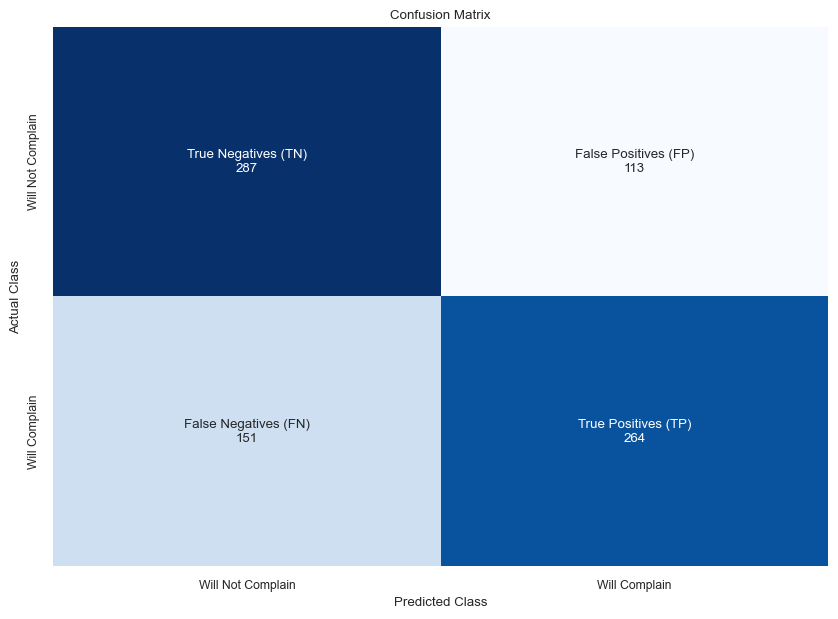

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['Will Not Complain', 'Will Complain']   # change these as per your class labels

# Get the confusion matrix
Prediction_conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(Prediction_conf_matrix, index=class_labels, columns=class_labels)

# Define the labels for the annotations
labels = np.array([['True Negatives (TN)', 'False Positives (FP)'],
                   ['False Negatives (FN)', 'True Positives (TP)']])

# Add counts to labels
labels = (np.array(["{0}\n{1:.0f}".format(text, data) 
                    for text, data in zip(labels.flatten(), conf_matrix_df.values.flatten())])).reshape(2,2)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig('confusion_matrix.png',bbox_inches='tight')
plt.show()

Predicting data in New Sample file

In [428]:
# Calculate the precision, recall and f1-score for each class
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_labels))


                   precision    recall  f1-score   support

Will Not Complain       0.66      0.72      0.68       400
    Will Complain       0.70      0.64      0.67       415

         accuracy                           0.68       815
        macro avg       0.68      0.68      0.68       815
     weighted avg       0.68      0.68      0.68       815



In [429]:
# Calculate the classification report
classification_dict = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)

# Convert the dictionary into a DataFrame
classification_df = pd.DataFrame(classification_dict).transpose()

# Print the DataFrame
print(classification_df.to_latex(float_format="%.2f",position="H",index=True,label="tab:classification_report",caption="Classification report for the logistic regression model"))


\begin{table}[H]
\centering
\caption{Classification report for the logistic regression model}
\label{tab:classification_report}
\begin{tabular}{lrrrr}
\toprule
{} &  precision &  recall &  f1-score &  support \\
\midrule
Will Not Complain &       0.66 &    0.72 &      0.68 &   400.00 \\
Will Complain     &       0.70 &    0.64 &      0.67 &   415.00 \\
accuracy          &       0.68 &    0.68 &      0.68 &     0.68 \\
macro avg         &       0.68 &    0.68 &      0.68 &   815.00 \\
weighted avg      &       0.68 &    0.68 &      0.68 &   815.00 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\krist\AppData\Local\Temp\ipykernel_30184\2861488768.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(classification_df.to_latex(float_format="%.2f",position="H",index=True,label="tab:classification_report",caption="Classification report for the logistic regression model"))


In [430]:
new_data_num.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,15710408,584,1,0,38,3,0.00,2,True,True,4525.40,False,2,1,941
1,15598695,834,2,0,68,9,130169.27,2,False,True,93112.20,False,5,1,882
2,15649354,754,1,1,35,4,0.00,2,True,True,9658.41,False,1,2,474
3,15737556,590,0,1,43,7,81076.80,2,True,True,182627.25,True,1,0,253
4,15671610,740,0,1,36,7,0.00,1,True,True,13177.40,False,5,2,466


In [431]:
# Assume `scaler` was fitted on the training data

# Transform the new data
scaled_Attributes = scaler.transform(new_data_num)

# Convert to table format - MinMaxScaler
new_data_num = pd.DataFrame(data=scaled_Attributes, index=new_data_num.index, columns=new_data_num.columns)
new_data_num.sample(5)

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
10,0.960313,0.612,0.5,1.0,0.202703,0.4,0.000000,0.333333,1.0,0.0,0.583528,0.0,0.75,0.666667,0.992318
15,0.832153,0.816,0.5,0.0,0.229730,0.5,0.000000,0.333333,0.0,0.0,0.501818,0.0,0.00,0.000000,0.786172
8,0.876276,0.408,0.5,0.0,0.378378,0.7,0.349159,0.666667,0.0,1.0,0.484635,1.0,0.75,1.000000,0.766965
16,0.762009,0.664,0.0,1.0,0.432432,0.6,0.485531,0.333333,0.0,1.0,0.620758,0.0,0.00,0.666667,0.760563
12,0.173231,0.260,0.5,1.0,0.391892,0.8,0.300554,0.000000,1.0,0.0,0.129394,1.0,0.75,0.666667,0.431498


In [432]:
# Predict outcomes using the logistic regression model
#y_new_pred = LR_model.predict(X_new_sample)


# Add the predictions as a new column to the original dataset
#new_data_num['Predicted Complain'] = y_new_pred

# Print the new dataset with predictions
new_data_num.head(5)


NameError: name 'X_new_sample' is not defined

In [ ]:

# Convert the predictions to a DataFrame
df_predictions = pd.DataFrame(y_new_pred, columns=['Predicted Complain'], index=X_new_sample.index)

# Concatenate the predictions with the original dataset
new_data_with_predictions = pd.concat([new_data, df_predictions], axis=1)

# Print the new dataset with predictions
print(new_data_with_predictions.to_latex(float_format="%.2f",position="H",index=True))

\begin{table}[H]
\centering
\begin{tabular}{lrrllrrrrllrlrlrl}
\toprule
{} &  CustomerId &  CreditScore & Location &  Gender &  Age &  Tenure &   Balance &  NumOfProducts &  HasCreditCard &  IsActiveMember &  EstimatedSalary &  Exited &  Satisfaction Score & Card Type &  Point Earned &  Predicted Complain \\
\midrule
0  &    15710408 &          584 &    Spain &  Female &   38 &       3 &      0.00 &              2 &           True &            True &          4525.40 &   False &                   2 &      GOLD &           941 &               False \\
1  &    15598695 &          834 &  Germany &  Female &   68 &       9 & 130169.27 &              2 &          False &            True &         93112.20 &   False &                   5 &      GOLD &           882 &                True \\
2  &    15649354 &          754 &    Spain &    Male &   35 &       4 &      0.00 &              2 &           True &            True &          9658.41 &   False &                   1 &    SILVER &       

C:\Users\krist\AppData\Local\Temp\ipykernel_35060\3557047285.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(new_data_with_predictions.to_latex(float_format="%.2f",position="H",index=True))


Alternative try

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# create graph a correlation analaysis on all elements

import statsmodels.api as sm

# Create dummy variables for categorical variables like 'Gender'
df_dummies = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define the independent and dependent variables
alt_X = df_dummies[['Age', 'Tenure', 'Gender_Male']]
alt_y = df_dummies['Complain']

# Add a constant term to the independent variables
alt_X = sm.add_constant(alt_X)

# Fit the logistic regression model
logit_model = sm.Logit(alt_y, alt_X).fit()

Optimization terminated successfully.
         Current function value: 0.463351
         Iterations 6


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score


# Extract the features and target variable
alt_X = df[['Balance', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']]
alt_y = df['Complain']

# Normalize the features
scaler = StandardScaler()
X_norm = scaler.fit_transform(alt_X)

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_norm)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, alt_y, test_size=0.3, random_state=42)

# Fit a linear regression model on the training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions using the model on the testing data
y_pred = linreg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

# Calculate the MAE score
mae = mean_absolute_error(y_test, y_pred)
print('MAE score:', mae)

# Calculate the MSE score
mse = mean_squared_error(y_test, y_pred)
print('MSE score:', mse)

# Calculate the RMSE score
rmse = np.sqrt(mse)
print('RMSE score:', rmse)

# Calculate the accuracy score
y_pred_class = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy score:', accuracy)

# print the confusion matrix
from sklearn.metrics import confusion_matrix


# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(conf_matrix)


R-squared score: 0.2161646918973752
MAE score: 0.2648892647960249
MSE score: 0.12178674141820457
RMSE score: 0.3489795716345078
Accuracy score: 0.8229792919171677
[[2380   38    0]
 [ 483   84    9]
 [   0    0    0]]


In [ ]:

# Extract the features and target variable
alt_X = df[['Balance', 'Age']]
alt_y = df['Complain']

# Normalize the features
scaler = StandardScaler()
X_norm = scaler.fit_transform(alt_X)

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_norm)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, alt_y, test_size=0.3, random_state=42)

# Fit a linear regression model on the training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions using the model on the testing data
y_pred = linreg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

# Calculate the MAE score
mae = mean_absolute_error(y_test, y_pred)
print('MAE score:', mae)

# Calculate the MSE score
mse = mean_squared_error(y_test, y_pred)
print('MSE score:', mse)

# Calculate the RMSE score
rmse = np.sqrt(mse)
print('RMSE score:', rmse)

# Calculate the accuracy score
y_pred_class = np.round(y_pred)
accuracy = np.mean(y_pred_class == y_test)
print('Accuracy score:', accuracy)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(conf_matrix)

R-squared score: 0.10198586957058364
MAE score: 0.292550948477558
MSE score: 0.13952703273502223
RMSE score: 0.37353317487878135
Accuracy score: 0.8032732130928524
[[2401   17]
 [ 572    4]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Extract the features and target variable
alt_X = df[['Balance', 'Age']]
alt_y = df['Complain']

# Normalize the features
scaler = StandardScaler()
X_norm = scaler.fit_transform(alt_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, alt_y, test_size=0.3, random_state=42)

# Fit a Gaussian Naive Bayes model on the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions using the model on the testing data
y_pred = nb.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(conf_matrix)

Accuracy score: 0.7909151636606546
[[2401   17]
 [ 572    4]]


## Task C: (10%)

Once your model is finalised, use it to predict whether the bank
customers included in New Sample file, will complain about the
banking services based on their profile information in the dataset.
Tabulate the predicated results in your report, in the order the
records are arranged in the file. This will be compared with the
expected outcomes for assessing the goodness of your model.